In [1]:
from google.colab import drive
import os

# Clear cached credentials
os.environ.pop('GDRIVE_CREDENTIALS', None)

# Mount Google Drive with a longer timeout
drive.mount('/content/drive', timeout_ms=300000)

Mounted at /content/drive


In [ ]:
from google.colab import drive
import os

# load dfs
base_path = "/content/drive/MyDrive/Diagnovision/filtered_df"
csv_files = ["train_df.csv", "val_df.csv", "test_df.csv"]

# Verify if the files exist
for file in csv_files:
    path = os.path.join(base_path, file)
    if os.path.exists(path):
        print(f"{file} found.")
    else:
        print(f"⚠ ERROR: {file} Not found.")


train_df.csv found.
val_df.csv found.
test_df.csv found.


In [ ]:
import pandas as pd
import os

# Define dataset paths
base_path = "/content/drive/MyDrive/Diagnovision/filtered_df"
csv_files = {
    "train": os.path.join(base_path, "train_df.csv"),
    "val": os.path.join(base_path, "val_df.csv"),
    "test": os.path.join(base_path, "test_df.csv")
}

# Load datasets
df_train = pd.read_csv(csv_files["train"])
df_val = pd.read_csv(csv_files["val"])
df_test = pd.read_csv(csv_files["test"])

# Display basic information
print("Train Dataset:")
print(df_train.info(), "\n")
print("Validation Dataset:")
print(df_val.info(), "\n")
print("Test Dataset:")
print(df_test.info(), "\n")

# Check for missing values
print("Missing values in Train:\n", df_train.isnull().sum())
print("\nMissing values in Validation:\n", df_val.isnull().sum())
print("\nMissing values in Test:\n", df_test.isnull().sum())

# Verify that labels are binary (1 or 0)
pathology_columns = [
    "Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity", "Lung Lesion", "Edema",
    "Consolidation", "Pneumonia", "Atelectasis", "Pneumothorax", "Pleural Effusion",
    "Pleural Other", "Fracture"
]

for column in pathology_columns:
    unique_values = df_train[column].unique()
    if not set(unique_values).issubset({0, 1}):
        print(f"⚠ ERROR: The column '{column}' contains values outside the range [0,1]: {unique_values}")


Train Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34048 entries, 0 to 34047
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   path_to_image               34048 non-null  object 
 1   deid_patient_id             34048 non-null  object 
 2   Enlarged Cardiomediastinum  34048 non-null  float64
 3   Cardiomegaly                34048 non-null  float64
 4   Lung Opacity                34048 non-null  float64
 5   Lung Lesion                 34048 non-null  float64
 6   Edema                       34048 non-null  float64
 7   Consolidation               34048 non-null  float64
 8   Pneumonia                   34048 non-null  float64
 9   Atelectasis                 34048 non-null  float64
 10  Pneumothorax                34048 non-null  float64
 11  Pleural Effusion            34048 non-null  float64
 12  Pleural Other               34048 non-null  float64
 13  Fracture        

In [ ]:
# Print dataset shapes
print(f"Train Set Shape: {df_train.shape}")
print(f"Validation Set Shape: {df_val.shape}")
print(f"Test Set Shape: {df_test.shape}")

Train Set Shape: (34048, 15)
Validation Set Shape: (7296, 15)
Test Set Shape: (7297, 15)


# **Verify image loading and preprocessing**

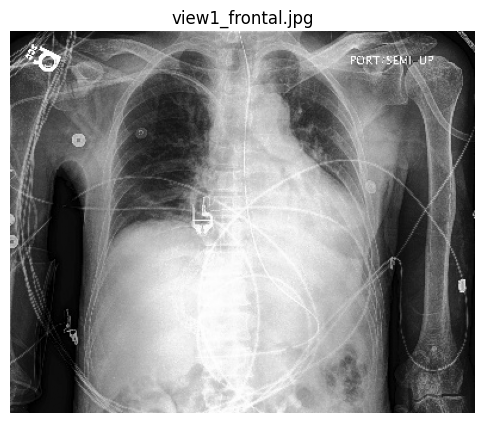

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directly specify an image path (change this if needed)
sample_image = "/content/drive/MyDrive/Diagnovision/dataset_extracted/train/patient63538/study1/view1_frontal.jpg"

# Check if file exists before loading
if not os.path.exists(sample_image):
    raise ValueError(f"File not found: {sample_image}")

# Load and display the image
image = Image.open(sample_image)
plt.figure(figsize=(6,6))
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.title(os.path.basename(sample_image))
plt.show()


## **preparing zip for tensors**

In [ ]:
import torch
print("GPU Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")


GPU Available: True
GPU Name: Tesla T4


In [ ]:
!cp /content/drive/MyDrive/Diagnovision/dataset_extracted.zip /content/

In [ ]:
!unzip /content/dataset_extracted.zip -d /content/dataset_local


Se truncaron las últimas líneas 5000 del resultado de transmisión.
   creating: /content/dataset_local/dataset_extracted/train/patient62870/study1/
  inflating: /content/dataset_local/dataset_extracted/train/patient62870/study1/view1_frontal.jpg  
   creating: /content/dataset_local/dataset_extracted/train/patient62871/
   creating: /content/dataset_local/dataset_extracted/train/patient62871/study1/
  inflating: /content/dataset_local/dataset_extracted/train/patient62871/study1/view1_frontal.jpg  
   creating: /content/dataset_local/dataset_extracted/train/patient62872/
   creating: /content/dataset_local/dataset_extracted/train/patient62872/study1/
  inflating: /content/dataset_local/dataset_extracted/train/patient62872/study1/view1_frontal.jpg  
   creating: /content/dataset_local/dataset_extracted/train/patient62873/
   creating: /content/dataset_local/dataset_extracted/train/patient62873/study1/
  inflating: /content/dataset_local/dataset_extracted/train/patient62873/study1/view1_f

In [ ]:
!ls /content/dataset_local/


dataset_extracted  view1_frontal.jpg  view2_frontal.jpg


In [ ]:
!ls -R /content/dataset_local/



Se truncaron las últimas líneas 5000 del resultado de transmisión.
/content/dataset_local/dataset_extracted/train/patient63704/study1:
view1_frontal.jpg

/content/dataset_local/dataset_extracted/train/patient63705:
study1

/content/dataset_local/dataset_extracted/train/patient63705/study1:
view1_frontal.jpg

/content/dataset_local/dataset_extracted/train/patient63706:
study1

/content/dataset_local/dataset_extracted/train/patient63706/study1:
view1_frontal.jpg

/content/dataset_local/dataset_extracted/train/patient63707:
study1

/content/dataset_local/dataset_extracted/train/patient63707/study1:
view1_frontal.jpg

/content/dataset_local/dataset_extracted/train/patient63708:
study1

/content/dataset_local/dataset_extracted/train/patient63708/study1:
view1_frontal.jpg

/content/dataset_local/dataset_extracted/train/patient63709:
study1

/content/dataset_local/dataset_extracted/train/patient63709/study1:
view1_frontal.jpg

/content/dataset_local/dataset_extracted/train/patient63710:
study

In [ ]:
# Extract relative paths (removes dataset root)
relative_paths = [os.path.relpath(img, dataset_root) for img in image_files[:10]]
print("Sample Relative Paths:", relative_paths)


Sample Relative Paths: ['patient41854/study1/view1_frontal.jpg', 'patient47815/study1/view1_frontal.jpg', 'patient36210/study1/view1_frontal.jpg', 'patient55321/study2/view1_frontal.jpg', 'patient36342/study1/view1_frontal.jpg', 'patient62800/study1/view1_frontal.jpg', 'patient00543/study2/view1_frontal.jpg', 'patient37177/study1/view1_frontal.jpg', 'patient01475/study1/view1_frontal.jpg', 'patient19871/study1/view1_frontal.jpg']


In [ ]:
import pandas as pd

# Load the dataset (change path if needed)
csv_path = "/content/drive/MyDrive/Diagnovision/filtered_df/train_df.csv"  # Change if using val/test
df = pd.read_csv(csv_path)

# Print the first 5 filenames from the CSV
print(df["path_to_image"].head(5))  # Adjust column name if needed


0    train/patient52010/study1/view1_frontal.jpg
1    train/patient21893/study1/view1_frontal.jpg
2    train/patient57327/study1/view1_frontal.jpg
3    train/patient15331/study1/view1_frontal.jpg
4    train/patient38697/study1/view1_frontal.jpg
Name: path_to_image, dtype: object


# **Img resize - normalize**

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import os
from tqdm import tqdm
import shutil

# ✅ DELETE OLD TENSOR FOLDER TO AVOID MIXED FILES
tensor_save_folder = "/content/drive/MyDrive/Diagnovision/preprocessed_tensors"
shutil.rmtree(tensor_save_folder, ignore_errors=True)  # Delete old tensors
os.makedirs(tensor_save_folder, exist_ok=True)  # Recreate clean folder

# ✅ DEFINE IMAGE DATASET PATH
dataset_root = "/content/dataset_local/dataset_extracted/train"  # Change if needed

# ✅ IMAGE PROCESSING PIPELINE
image_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for CNNs
    transforms.Grayscale(num_output_channels=3),  # Ensure 3 channels
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ✅ FIND ALL IMAGES IN THE DATASET
image_paths = []
for root, _, files in os.walk(dataset_root):
    for file in files:
        if file.lower().endswith((".jpg", ".png", ".jpeg")):
            image_paths.append(os.path.join(root, file))

print(f"Processing {len(image_paths)} images...")

# ✅ PROCESS IMAGES & SAVE TENSORS WITH CORRECT FILENAMES
for img_path in tqdm(image_paths, desc="Processing Images"):
    try:
        image = Image.open(img_path).convert("RGB")
        processed_image = image_transforms(image)

        # ✅ GET RELATIVE PATH (INCLUDING "train/" FROM CSV)
        relative_path = os.path.relpath(img_path, os.path.dirname(dataset_root))  # Include "train/" in the path

        # ✅ MODIFY ONLY THE IMAGE NAME (LEAVE DIRECTORIES WITH FORWARD SLASHES)
        dir_path, file_name = os.path.split(relative_path)  # Split into directory and filename
        file_name = file_name.replace(".jpg", "").replace(".png", "").replace(".jpeg", "")  # Remove extension

        # ✅ COMBINE DIRECTORY AND FILENAME (PRESERVE FORWARD SLASHES IN DIRECTORY)
        tensor_filename = os.path.join(dir_path, file_name + ".pt")  # Use forward slashes for directories

        # ✅ CREATE NECESSARY SUBDIRECTORIES (IF ANY)
        tensor_file_path = os.path.join(tensor_save_folder, tensor_filename)
        os.makedirs(os.path.dirname(tensor_file_path), exist_ok=True)

        # ✅ SAVE TENSOR
        torch.save(processed_image, tensor_file_path)

    except Exception as e:
        print(f"❌ ERROR processing {img_path}: {e}")

print(f"✅ PROCESSING COMPLETE. Tensors saved in: {tensor_save_folder}")

Processing 48641 images...


Processing Images: 100%|██████████| 48641/48641 [14:57<00:00, 54.22it/s]

✅ PROCESSING COMPLETE. Tensors saved in: /content/drive/MyDrive/Diagnovision/preprocessed_tensors


In [ ]:
import os
import torch
import pandas as pd

# Define paths
tensor_folder = "/content/drive/MyDrive/Diagnovision/preprocessed_tensors"
csv_path = "/content/drive/MyDrive/Diagnovision/filtered_df/train_df.csv"  # Change for val & test

# Load CSV
df = pd.read_csv(csv_path)

# Verify that all CSV entries have a matching tensor file
missing_tensors = []
total_images = len(df)

for img_path in df["path_to_image"]:  # Ensure this column name matches the CSV
    tensor_path = os.path.join(tensor_folder, img_path.replace(".jpg", ".pt").replace(".png", ".pt"))

    # Check if the tensor exists
    if not os.path.exists(tensor_path):
        missing_tensors.append(tensor_path)

# Print results
if not missing_tensors:
    print(f"All {total_images} tensors found. Ready for training.")
else:
    print(f"{len(missing_tensors)} missing tensors found.")
    print("Examples:", missing_tensors[:5])  # Show first 5 missing files


All 34048 tensors found. Ready for training.


In [ ]:
import os
import torch
import pandas as pd

# Define paths
tensor_folder = "/content/drive/MyDrive/Diagnovision/preprocessed_tensors"
csv_path = "/content/drive/MyDrive/Diagnovision/filtered_df/val_df.csv"  # Change for val & test

# Load CSV
df = pd.read_csv(csv_path)

# Verify that all CSV entries have a matching tensor file
missing_tensors = []
total_images = len(df)

for img_path in df["path_to_image"]:  # Ensure this column name matches the CSV
    tensor_path = os.path.join(tensor_folder, img_path.replace(".jpg", ".pt").replace(".png", ".pt"))

    # Check if the tensor exists
    if not os.path.exists(tensor_path):
        missing_tensors.append(tensor_path)

# Print results
if not missing_tensors:
    print(f"All {total_images} tensors found. Ready for training.")
else:
    print(f"{len(missing_tensors)} missing tensors found.")
    print("Examples:", missing_tensors[:5])  # Show first 5 missing files

All 7296 tensors found. Ready for training.


In [ ]:
import os
import torch
import pandas as pd

# Define paths
tensor_folder = "/content/drive/MyDrive/Diagnovision/preprocessed_tensors"
csv_path = "/content/drive/MyDrive/Diagnovision/filtered_df/test_df.csv"  # Change for val & test

# Load CSV
df = pd.read_csv(csv_path)

# Verify that all CSV entries have a matching tensor file
missing_tensors = []
total_images = len(df)

for img_path in df["path_to_image"]:  # Ensure this column name matches the CSV
    tensor_path = os.path.join(tensor_folder, img_path.replace(".jpg", ".pt").replace(".png", ".pt"))

    # Check if the tensor exists
    if not os.path.exists(tensor_path):
        missing_tensors.append(tensor_path)

# Print results
if not missing_tensors:
    print(f"All {total_images} tensors found. Ready for training.")
else:
    print(f"{len(missing_tensors)} missing tensors found.")
    print("Examples:", missing_tensors[:5])  # Show first 5 missing files

All 7297 tensors found. Ready for training.


# **Create PyTorch Dataset & DataLoader for TRAIN**

In [ ]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from tqdm import tqdm
from torch.utils.data.dataloader import default_collate

# Define paths
tensor_save_folder = "/content/drive/MyDrive/Diagnovision/preprocessed_tensors"  # Folder with tensors
csv_path = "/content/drive/MyDrive/Diagnovision/filtered_df/train_df.csv"  # Path to train CSV

# Define pathology columns
pathology_columns = [
    "Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity", "Lung Lesion", "Edema",
    "Consolidation", "Pneumonia", "Atelectasis", "Pneumothorax", "Pleural Effusion",
    "Pleural Other", "Fracture"
]

# Dataset Class
class XRayDataset(Dataset):
    def __init__(self, tensor_folder, csv_path):
        self.tensor_folder = tensor_folder
        self.labels_df = pd.read_csv(csv_path)  # Load CSV with labels
        self.labels_df["path_to_image"] = self.labels_df["path_to_image"].str.strip().str.replace("\\", "/").str.lower()  # Normalize paths
        self.tensor_files = self._find_tensor_files(tensor_folder)  # Get .pt files
        print(f"Found {len(self.tensor_files)} tensor files.")  # Print total files found

    def _find_tensor_files(self, folder):
        tensor_files = []
        print("Finding tensor files...")
        for root, _, files in tqdm(os.walk(folder), desc="Searching subfolders"):
            for file in files:
                if file.endswith(".pt"):
                    tensor_path = os.path.join(root, file)
                    # Convert tensor path to image path for lookup in CSV
                    relative_path = os.path.relpath(tensor_path, self.tensor_folder).replace(".pt", ".jpg")
                    relative_path = relative_path.strip().replace("\\", "/").lower()  # Normalize path
                    # Check if the image path exists in the CSV
                    if relative_path in self.labels_df["path_to_image"].values:
                        tensor_files.append(tensor_path)
        return tensor_files

    def __len__(self):
        return len(self.tensor_files)  # Total samples

    def __getitem__(self, idx):
        # Load tensor
        tensor_path = self.tensor_files[idx]
        tensor = torch.load(tensor_path, weights_only=True)  # Add weights_only=True for security

        # Extract correct relative path for label lookup
        relative_path = os.path.relpath(tensor_path, self.tensor_folder).replace(".pt", ".jpg")
        relative_path = relative_path.strip().replace("\\", "/").lower()  # Normalize path

        # Find the corresponding label in CSV
        label_row = self.labels_df[self.labels_df["path_to_image"] == relative_path]
        if label_row.empty:
            print(f"Warning: Label not found for {relative_path}. Skipping this sample.")
            return None, None  # Skip this sample

        labels = label_row[pathology_columns].values[0]  # Extract labels
        labels = torch.tensor(labels, dtype=torch.float32)  # Convert to tensor

        return tensor, labels

# Custom collate function to filter out None samples
def collate_fn(batch):
    batch = [sample for sample in batch if sample[0] is not None]
    if len(batch) == 0:
        return None, None
    return default_collate(batch)

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Create Dataset and DataLoader
dataset = XRayDataset(tensor_save_folder, csv_path)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)

# Test DataLoader
for batch in tqdm(dataloader, desc="Processing batches"):
    if batch[0] is None:  # Skip if batch is empty
        continue
    images, labels = batch
    images = images.to(device)
    labels = labels.to(device)
    print("Images shape:", images.shape)  # (batch_size, 3, 224, 224)
    print("Labels shape:", labels.shape)  # (batch_size, 12)
    break

Using device: cuda
Finding tensor files...


Searching subfolders: 97284it [02:03, 788.11it/s]


Found 34048 tensor files.


Processing batches:   0%|          | 0/1064 [00:00<?, ?it/s]

Images shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32, 12])


## **saving tensor train df**

In [ ]:
# Save the entire dataset to a file
all_data = [(torch.load(tensor_path), torch.tensor(labels, dtype=torch.float32))
            for tensor_path, labels in zip(dataset.tensor_files, dataset.labels_df[pathology_columns].values)]
torch.save(all_data, "/content/drive/MyDrive/Diagnovision/filtered_df/tensor_df/train_tensor_df.pt")

<ipython-input-80-fdef40a4f6d1>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  all_data = [(torch.load(tensor_path), torch.tensor(labels, dtype=torch.float32))


In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/Diagnovision/filtered_df/tensor_df"))

['train_tensor_df.pt']


## **Load dataloader TRAIN**

In [103]:
import torch
from torch.utils.data import Dataset, DataLoader

# Load the dataset as a memory-mapped tensor
# Use map_location="cpu" to load into CPU memory as a memory-mapped file
all_data = torch.load("/content/drive/MyDrive/Diagnovision/filtered_df/tensor_df/train_tensor_df.pt", map_location="cpu")

# Create a Dataset class for the memory-mapped tensor
class MemoryMappedDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Only this slice is loaded into RAM
        return self.data[idx]

# Create DataLoader
dataset = MemoryMappedDataset(all_data)
train_dataloader = DataLoader(dataset, batch_size=12, shuffle=True)

<ipython-input-103-4c66a38f4a8d>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  all_data = torch.load("/content/drive/MyDrive/Diagnovision/filtered_df/tensor_df/train_tens

# **Create PyTorch Dataset & DataLoader for VAL**

In [ ]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from tqdm import tqdm

# Define paths for validation
tensor_save_folder = "/content/drive/MyDrive/Diagnovision/preprocessed_tensors"  # Folder with tensors
val_csv_path = "/content/drive/MyDrive/Diagnovision/filtered_df/val_df.csv"  # Path to validation CSV

# Define pathology columns
pathology_columns = [
    "Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity", "Lung Lesion", "Edema",
    "Consolidation", "Pneumonia", "Atelectasis", "Pneumothorax", "Pleural Effusion",
    "Pleural Other", "Fracture"
]

# Dataset Class
class XRayDataset(Dataset):
    def __init__(self, tensor_folder, csv_path):
        self.tensor_folder = tensor_folder
        self.labels_df = pd.read_csv(csv_path)  # Load CSV with labels
        self.labels_df["path_to_image"] = self.labels_df["path_to_image"].str.strip().str.replace("\\", "/").str.lower()  # Normalize paths
        self.tensor_files = self._find_tensor_files(tensor_folder)  # Get .pt files
        print(f"Found {len(self.tensor_files)} tensor files.")  # Print total files found

    def _find_tensor_files(self, folder):
        tensor_files = []
        print("Finding tensor files...")
        for root, _, files in tqdm(os.walk(folder), desc="Searching subfolders"):
            for file in files:
                if file.endswith(".pt"):
                    tensor_path = os.path.join(root, file)
                    # Convert tensor path to image path for lookup in CSV
                    relative_path = os.path.relpath(tensor_path, self.tensor_folder).replace(".pt", ".jpg")
                    relative_path = relative_path.strip().replace("\\", "/").lower()  # Normalize path
                    # Check if the image path exists in the CSV
                    if relative_path in self.labels_df["path_to_image"].values:
                        tensor_files.append(tensor_path)
        return tensor_files

    def __len__(self):
        return len(self.tensor_files)  # Total samples

    def __getitem__(self, idx):
        # Load tensor
        tensor_path = self.tensor_files[idx]
        tensor = torch.load(tensor_path, weights_only=True)  # Add weights_only=True for security

        # Extract correct relative path for label lookup
        relative_path = os.path.relpath(tensor_path, self.tensor_folder).replace(".pt", ".jpg")
        relative_path = relative_path.strip().replace("\\", "/").lower()  # Normalize path

        # Find the corresponding label in CSV
        label_row = self.labels_df[self.labels_df["path_to_image"] == relative_path]
        if label_row.empty:
            print(f"Warning: Label not found for {relative_path}. Skipping this sample.")
            return None, None  # Skip this sample

        labels = label_row[pathology_columns].values[0]  # Extract labels
        labels = torch.tensor(labels, dtype=torch.float32)  # Convert to tensor

        return tensor, labels

# Create Validation Dataset
val_dataset = XRayDataset(tensor_save_folder, val_csv_path)

# Save the entire validation dataset to a file
all_val_data = [(torch.load(tensor_path), torch.tensor(labels, dtype=torch.float32))
                for tensor_path, labels in zip(val_dataset.tensor_files, val_dataset.labels_df[pathology_columns].values)]
torch.save(all_val_data, "/content/drive/MyDrive/Diagnovision/filtered_df/tensor_df/val_tensor_df.pt")



print("Validation dataset saved!")

Finding tensor files...


Searching subfolders: 97284it [01:32, 1050.95it/s]
<ipython-input-82-a9937e83fe2c>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  all_val_data = [(torch.load(tensor_path)

Found 7296 tensor files.
Validation dataset saved!


## **Load dataloader VAL**

In [2]:
import torch

# Define the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [102]:
import torch
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

# Load the validation dataset as a memory-mapped tensor
# Use map_location="cpu" to load into CPU memory as a memory-mapped file
all_val_data = torch.load("/content/drive/MyDrive/Diagnovision/filtered_df/tensor_df/val_tensor_df.pt", map_location="cpu")

# Create a Dataset class for the memory-mapped tensor
class MemoryMappedDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Only this slice is loaded into RAM
        return self.data[idx]

# Create Validation DataLoader
val_dataset = MemoryMappedDataset(all_val_data)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)  # Shuffle=False for validation

# Test Validation DataLoader
for batch in tqdm(val_dataloader, desc="Processing validation batches"):
    images, labels = batch
    images = images.to(device)
    labels = labels.to(device)
    print("Validation Images shape:", images.shape)  # (batch_size, 3, 224, 224)
    print("Validation Labels shape:", labels.shape)  # (batch_size, 12)
    break

<ipython-input-102-db4aa2e1a0d0>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  all_val_data = torch.load("/content/drive/MyDrive/Diagnovision/filtered_df/tensor_df/val_te

Validation Images shape: torch.Size([32, 3, 224, 224])
Validation Labels shape: torch.Size([32, 12])


Processing validation batches:   0%|          | 0/228 [00:02<?, ?it/s]


## **test dataloader**

In [3]:
import os
import torch
from torch.utils.data import Dataset
import pandas as pd
from tqdm import tqdm

# 📌 **Rutas**
tensor_save_folder = "/content/drive/MyDrive/Diagnovision/preprocessed_tensors"  # Carpeta con tensores
test_csv_path = "/content/drive/MyDrive/Diagnovision/filtered_df/test_df.csv"  # CSV de test
output_tensor_path = "/content/drive/MyDrive/Diagnovision/filtered_df/tensor_df/test_tensor_df.pt"  # Archivo de salida

# 📌 **Columnas de patologías**
pathology_columns = [
    "Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity", "Lung Lesion", "Edema",
    "Consolidation", "Pneumonia", "Atelectasis", "Pneumothorax", "Pleural Effusion",
    "Pleural Other", "Fracture"
]

# 📌 **Cargar CSV y Normalizar Paths**
df_test = pd.read_csv(test_csv_path)
df_test["path_to_image"] = df_test["path_to_image"].str.strip().str.replace("\\", "/").str.lower()

# 🔥 **Convertimos paths de imágenes a paths de tensores**
df_test["path_to_tensor"] = df_test["path_to_image"].str.replace(".jpg", ".pt")

# 📌 **Clase Dataset para Cargar Tensores de Test**
class XRayTestDataset(Dataset):
    def __init__(self, tensor_folder, df_test):
        self.tensor_folder = tensor_folder
        self.df_test = df_test
        self.tensor_paths = self.df_test["path_to_tensor"].values  # 🔥 Usar solo paths de test
        print(f"✅ Se encontraron {len(self.tensor_paths)} tensores de test en el CSV.")

    def __len__(self):
        return len(self.tensor_paths)  # Total de muestras

    def __getitem__(self, idx):
        tensor_rel_path = self.tensor_paths[idx]
        tensor_path = os.path.join(self.tensor_folder, tensor_rel_path)

        if not os.path.exists(tensor_path):
            print(f"⚠️ Advertencia: No se encontró el tensor {tensor_path}. Se omite.")
            return None, None  # Omitir muestra

        tensor = torch.load(tensor_path, weights_only=True)  # Seguridad con weights_only=True

        # Buscar la etiqueta en el CSV
        label_row = self.df_test[self.df_test["path_to_tensor"] == tensor_rel_path]
        if label_row.empty:
            print(f"⚠️ Advertencia: No se encontró etiqueta para {tensor_rel_path}. Se omite.")
            return None, None  # Omitir muestra

        labels = label_row[pathology_columns].values[0]  # Extraer etiquetas
        labels = torch.tensor(labels, dtype=torch.float32)  # Convertir a tensor

        return tensor, labels

# 📌 **Crear Dataset de Test**
test_dataset = XRayTestDataset(tensor_save_folder, df_test)

# 📌 **Guardar Todo el Dataset en un Solo Archivo**
all_test_data = [
    (torch.load(os.path.join(tensor_save_folder, tensor_path)),
     torch.tensor(labels, dtype=torch.float32))
    for tensor_path, labels in zip(test_dataset.tensor_paths, df_test[pathology_columns].values)
]

torch.save(all_test_data, output_tensor_path)

print(f"✅ Dataset de test guardado en: {output_tensor_path}")


✅ Se encontraron 7297 tensores de test en el CSV.


<ipython-input-3-0f02bcdfd71c>:63: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  (torch.load(os.path.join(tensor_save_folder, tensor_path)),


✅ Dataset de test guardado en: /content/drive/MyDrive/Diagnovision/filtered_df/tensor_df/test_tensor_df.pt


In [8]:
import torch
from torch.utils.data import Dataset, DataLoader

# Cargar el dataset de test como tensor mapeado
test_tensor_path = "/content/drive/MyDrive/Diagnovision/filtered_df/tensor_df/test_tensor_df.pt"
all_test_data = torch.load(test_tensor_path, map_location="cpu")

# Crear una clase Dataset para el test
class MemoryMappedDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# Crear el DataLoader de test
test_dataset = MemoryMappedDataset(all_test_data)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

print("✅ DataLoader de test cargado correctamente")


<ipython-input-8-4a06c55d436d>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  all_test_data = torch.load(test_tensor_path, map_location="cpu")


✅ DataLoader de test cargado correctamente


In [9]:
# Verificar el DataLoader de test
for images, labels in test_dataloader:
    print(f"Shape de imágenes: {images.shape}")  # Debe ser (batch_size, 3, 224, 224)
    print(f"Shape de etiquetas: {labels.shape}")  # Debe ser (batch_size, num_labels)
    print(f"Ejemplo de etiquetas: {labels[0]}")  # Ver un ejemplo de etiquetas
    break


Shape de imágenes: torch.Size([32, 3, 224, 224])
Shape de etiquetas: torch.Size([32, 12])
Ejemplo de etiquetas: tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [4]:
import numpy as np

# Initialize variables to store statistics
train_label_counts = np.zeros(12)  # Assuming 12 pathologies
train_samples_with_no_labels = 0
val_label_counts = np.zeros(12)  # Assuming 12 pathologies
val_samples_with_no_labels = 0

# Process TRAINING DataLoader in batches
for batch in train_dataloader:
    images, labels = batch
    labels = labels.cpu().numpy()  # Convert labels to numpy

    # Update label counts
    train_label_counts += np.sum(labels, axis=0)

    # Count samples with no labels
    train_samples_with_no_labels += np.sum(np.sum(labels, axis=1) == 0)

# Process VALIDATION DataLoader in batches
for batch in val_dataloader:
    images, labels = batch
    labels = labels.cpu().numpy()  # Convert labels to numpy

    # Update label counts
    val_label_counts += np.sum(labels, axis=0)

    # Count samples with no labels
    val_samples_with_no_labels += np.sum(np.sum(labels, axis=1) == 0)

# Print statistics
print("Training set - Label distribution (pathology counts):", train_label_counts)
print("Training set - Number of samples with no labels (all pathologies absent):", train_samples_with_no_labels)
print("Validation set - Label distribution (pathology counts):", val_label_counts)
print("Validation set - Number of samples with no labels (all pathologies absent):", val_samples_with_no_labels)

Training set - Label distribution (pathology counts): [ 1948.  3623. 14742.  1334.  7396.  1837.   872.  5437.  2274. 10465.
   384.  1773.]
Training set - Number of samples with no labels (all pathologies absent): 7310
Validation set - Label distribution (pathology counts): [ 429.  782. 3159.  317. 1546.  395.  168. 1164.  460. 2240.   95.  389.]
Validation set - Number of samples with no labels (all pathologies absent): 1587


In [5]:
# Obtener un batch de entrenamiento
images, labels = next(iter(train_dataloader))

print(f"Image batch shape: {images.shape}")  # Debería ser (batch_size, 3, 224, 224)
print(f"Labels batch shape: {labels.shape}")  # Debería ser (batch_size, 12)


Image batch shape: torch.Size([12, 3, 224, 224])
Labels batch shape: torch.Size([12, 12])


In [6]:
import numpy as np

all_train_labels = []
for _, labels in train_dataloader:
    all_train_labels.append(labels.numpy())

all_train_labels = np.vstack(all_train_labels)  # Convertir a NumPy array
label_counts = np.sum(all_train_labels, axis=0)  # Contar ocurrencias por clase

print("Etiqueta - Número de muestras:")
for i, count in enumerate(label_counts):
    print(f"Clase {i}: {count}")


Etiqueta - Número de muestras:
Clase 0: 1948.0
Clase 1: 3623.0
Clase 2: 14742.0
Clase 3: 1334.0
Clase 4: 7396.0
Clase 5: 1837.0
Clase 6: 872.0
Clase 7: 5437.0
Clase 8: 2274.0
Clase 9: 10465.0
Clase 10: 384.0
Clase 11: 1773.0


In [3]:
import gc

gc.collect()  # Clear CPU memory
torch.cuda.empty_cache()  # Clear GPU memory

# 🚨 **Model training - Model Architecture**
## **efficient1_finalized**


We will use Transfer Learning with a pretrained EfficientNetV2, and modify it for multi-label classification:

1. Feature Extractor
Use a pretrained model (EfficientNetV2).

2. Fully Connected Head
Replace the final layer with a custom head for 12 output neurons.

3. Activation Function
Use Sigmoid for the output layer.

4. Loss Function
Use BCEWithLogitsLoss.

5. Optimizer
Use AdamW with weight decay.

6. Learning Rate Scheduler
Add a learning rate scheduler (e.g., ReduceLROnPlateau).

7. Data Augmentation
Add data augmentation to the training pipeline.

8. Early Stopping
Implement early stopping to prevent overfitting.

9. Class Imbalance
Address class imbalance using weighted loss or oversampling.

10. Mixed Precision Training
Use mixed precision training for faster training and lower memory usage.

## **Model definition**

1️⃣ Load EfficientNetV2 as the base model.

2️⃣ Replace the final classification layer with 12 output neurons.

3️⃣ Use sigmoid activation for multi-label prediction.

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load a pretrained model
model = models.efficientnet_v2_s(pretrained=True)

# Modify the final layer for multi-label classification
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 12)  # 12 pathologies

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:01<00:00, 76.8MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

## **Define Loss Function & Optimizer**

✔ Loss function: Binary Cross-Entropy with Logits (BCEWithLogitsLoss) for multi-label classification.

✔ Optimizer: AdamW (better weight regularization).

✔ Learning rate scheduler: ReduceLROnPlateau (adjusts LR based on validation loss).

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Loss function
criterion = nn.BCEWithLogitsLoss()

# Optimizer
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

# Learning rate scheduler
scheduler =  ReduceLROnPlateau(optimizer, mode="min", factor=0.1, patience=3)

# **Training Loop with early stopping**

Now we define the training loop, which will:

✔ Load batches of images and labels from the DataLoader.

✔ Perform forward pass through EfficientNetV2.

✔ Compute Binary Cross-Entropy loss.

✔ Perform backpropagation & optimization.

✔ Validate the model after each epoch.


In [10]:
import torch

# Check available GPU memory
total_memory = torch.cuda.get_device_properties(0).total_memory  # Total GPU memory
allocated_memory = torch.cuda.memory_allocated(0)  # Currently allocated memory
free_memory = total_memory - allocated_memory  # Free GPU memory

print(f"Total GPU Memory: {total_memory / 1024**3:.2f} GB")
print(f"Allocated GPU Memory: {allocated_memory / 1024**3:.2f} GB")
print(f"Free GPU Memory: {free_memory / 1024**3:.2f} GB")

Total GPU Memory: 14.74 GB
Allocated GPU Memory: 0.00 GB
Free GPU Memory: 14.74 GB


In [ ]:
from tqdm import tqdm
import os

num_epochs = 20  # Adjust as needed
best_val_loss = float('inf')
patience = 5  # Number of epochs to wait for improvement
early_stop_counter = 0

# Load checkpoint if it exists
checkpoint_path = "/content/drive/MyDrive/Diagnovision//modelo_img/best_models/checkpoint.pth"
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint["model_state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
    scheduler.load_state_dict(checkpoint["scheduler_state_dict"])
    epoch = checkpoint["epoch"]
    best_val_loss = checkpoint["best_val_loss"]
    early_stop_counter = checkpoint["early_stop_counter"]
    print(f"Resuming training from epoch {epoch+1}...")
else:
    epoch = 0
    print("Starting training from scratch...")

for epoch in range(epoch, num_epochs):
    model.train()
    train_loss = 0.0
    for images, labels in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs} (Train)"):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_dataloader, desc=f"Epoch {epoch+1}/{num_epochs} (Val)"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    # Print losses
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_dataloader)}, Val Loss: {val_loss/len(val_dataloader)}")

    # Learning rate scheduler step
    scheduler.step(val_loss)

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/efficient1.pth")
        print("Saved best model!")
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping!")
            break

    # Save checkpoint
    checkpoint = {
        "epoch": epoch + 1,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "scheduler_state_dict": scheduler.state_dict(),
        "best_val_loss": best_val_loss,
        "early_stop_counter": early_stop_counter
    }
    torch.save(checkpoint, checkpoint_path)
    print("Checkpoint saved!")

Starting training from scratch...


Epoch 1/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.45it/s]


Epoch 1/20, Train Loss: 0.3236163901119185, Val Loss: 0.321877312372651
Saved best model!
Checkpoint saved!


Epoch 2/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.41it/s]


Epoch 2/20, Train Loss: 0.3213377663888001, Val Loss: 0.3204854804564986
Saved best model!
Checkpoint saved!


Epoch 3/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.45it/s]


Epoch 3/20, Train Loss: 0.3209085440429858, Val Loss: 0.3211678793294388
Checkpoint saved!


Epoch 4/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.47it/s]


Epoch 4/20, Train Loss: 0.32031821802920063, Val Loss: 0.32060195335693525
Checkpoint saved!


Epoch 5/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.38it/s]


Epoch 5/20, Train Loss: 0.3202262025449879, Val Loss: 0.32068322134906785
Checkpoint saved!


Epoch 6/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.43it/s]


Epoch 6/20, Train Loss: 0.32003220650114755, Val Loss: 0.31974369921443757
Saved best model!
Checkpoint saved!


Epoch 7/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.46it/s]


Epoch 7/20, Train Loss: 0.319944486358033, Val Loss: 0.3199132748863153
Checkpoint saved!


Epoch 8/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.50it/s]


Epoch 8/20, Train Loss: 0.3199124380190075, Val Loss: 0.3203998834809713
Checkpoint saved!


Epoch 9/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.43it/s]


Epoch 9/20, Train Loss: 0.31986397221799967, Val Loss: 0.3204364810596433
Checkpoint saved!


Epoch 10/20 (Val): 100%|██████████| 228/228 [00:23<00:00,  9.52it/s]


Epoch 10/20, Train Loss: 0.31982868720814744, Val Loss: 0.32055833327927086
Checkpoint saved!


Epoch 11/20 (Val): 100%|██████████| 228/228 [00:23<00:00,  9.53it/s]


Epoch 11/20, Train Loss: 0.3192686654832096, Val Loss: 0.31946048232024177
Saved best model!
Checkpoint saved!


Epoch 12/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.49it/s]


Epoch 12/20, Train Loss: 0.31916413759685386, Val Loss: 0.3194812621855945
Checkpoint saved!


Epoch 13/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.50it/s]


Epoch 13/20, Train Loss: 0.3192084868024402, Val Loss: 0.31952249899245144
Checkpoint saved!


Epoch 14/20 (Val): 100%|██████████| 228/228 [00:23<00:00,  9.54it/s]


Epoch 14/20, Train Loss: 0.3191540919512069, Val Loss: 0.3194793823518251
Checkpoint saved!


Epoch 15/20 (Val): 100%|██████████| 228/228 [00:23<00:00,  9.55it/s]


Epoch 15/20, Train Loss: 0.319275835750807, Val Loss: 0.31945222230595455
Saved best model!
Checkpoint saved!


Epoch 16/20 (Val): 100%|██████████| 228/228 [00:23<00:00,  9.51it/s]


Epoch 16/20, Train Loss: 0.3191968676561281, Val Loss: 0.3194035108021477
Saved best model!
Checkpoint saved!


Epoch 17/20 (Val): 100%|██████████| 228/228 [00:23<00:00,  9.53it/s]


Epoch 17/20, Train Loss: 0.31920893636280756, Val Loss: 0.31940161338762235
Saved best model!
Checkpoint saved!


Epoch 18/20 (Val): 100%|██████████| 228/228 [00:23<00:00,  9.53it/s]


Epoch 18/20, Train Loss: 0.3191046585355786, Val Loss: 0.31940534253392305
Checkpoint saved!


Epoch 19/20 (Val): 100%|██████████| 228/228 [00:23<00:00,  9.55it/s]


Epoch 19/20, Train Loss: 0.31911478337580423, Val Loss: 0.319403131345385
Checkpoint saved!


Epoch 20/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.49it/s]


Epoch 20/20, Train Loss: 0.31910239560155484, Val Loss: 0.31940713452926855
Checkpoint saved!


In [ ]:
# Save the model
torch.save(model.state_dict(), "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/efficient1_finalized.pth")

# **Evaluacion modelo**

Validation Accuracy: 87.27%


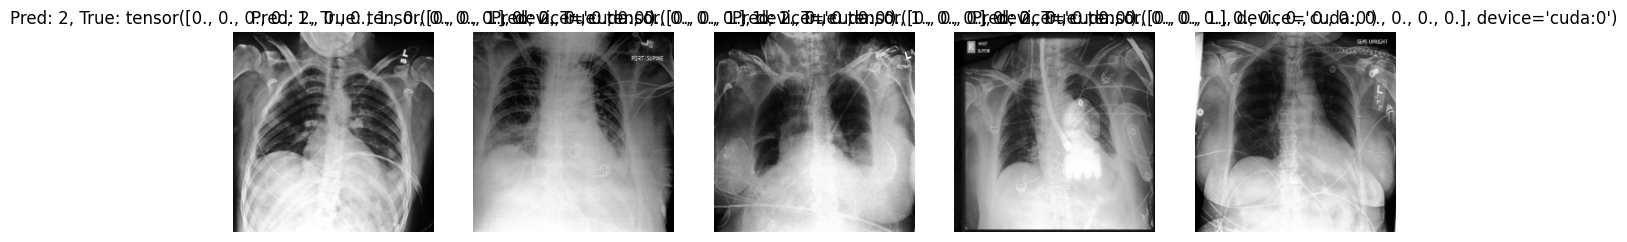

In [ ]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
threshold = 0.5  # Threshold for binary predictions

with torch.no_grad():  # Disable gradient calculation for evaluation
    for images, labels in val_dataloader:
        # Move data to the device (CPU or GPU)
        images, labels = images.to(device), labels.to(device)

        # Forward pass: Get model outputs (probabilities)
        outputs = model(images)

        # Step 1: Convert probabilities to binary predictions
        predicted = (outputs > threshold).float()  # Apply threshold

        # Step 2: Compare predictions with true labels
        correct += (predicted == labels).sum().item()  # Count correct predictions
        total += labels.size(0) * labels.size(1)  # Total number of labels (batch_size * num_classes)

# Step 3: Calculate accuracy
accuracy = 100 * correct / total
print(f"Validation Accuracy: {accuracy:.2f}%")


# Reverse normalization parameters
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Function to reverse normalization
def reverse_normalize(image, mean, std):
    for t, m, s in zip(image, mean, std):
        t.mul_(s).add_(m)  # Multiply by std and add mean
    return image

# Visualize predictions
model.eval()
with torch.no_grad():
    images, labels = next(iter(val_dataloader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Plot images with predictions
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    for i in range(5):
        # Reverse normalize the image
        image = images[i].cpu().clone()
        image = reverse_normalize(image, mean, std)
        image = image.permute(1, 2, 0)  # Change shape from (C, H, W) to (H, W, C)

        # Plot the image
        axes[i].imshow(image)
        axes[i].set_title(f"Pred: {predicted[i]}, True: {labels[i]}")
        axes[i].axis("off")
    plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Validation
model.eval()
val_loss = 0.0
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in tqdm(val_dataloader, desc=f"Epoch {epoch+1}/{num_epochs} (Val)"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        val_loss += loss.item()

        # Convert outputs to binary predictions (0 or 1) for each of the 12 pathologies
        preds = torch.sigmoid(outputs) > 0.5  # Threshold at 0.5
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Calculate label-based accuracy
correct = (np.array(all_preds)) == (np.array(all_labels))
label_accuracy = correct.mean() * 100  # Average across all labels

# Calculate precision, recall, and F1 score
precision_micro = precision_score(all_labels, all_preds, average='micro', zero_division=0)
precision_macro = precision_score(all_labels, all_preds, average='macro', zero_division=0)
recall_micro = recall_score(all_labels, all_preds, average='micro', zero_division=0)
recall_macro = recall_score(all_labels, all_preds, average='macro', zero_division=0)
f1_micro = f1_score(all_labels, all_preds, average='micro', zero_division=0)
f1_macro = f1_score(all_labels, all_preds, average='macro', zero_division=0)

print(f"Validation Label Accuracy: {label_accuracy:.2f}%")
print(f"Validation Precision (Micro): {precision_micro:.4f}")
print(f"Validation Precision (Macro): {precision_macro:.4f}")
print(f"Validation Recall (Micro): {recall_micro:.4f}")
print(f"Validation Recall (Macro): {recall_macro:.4f}")
print(f"Validation F1 Score (Micro): {f1_micro:.4f}")
print(f"Validation F1 Score (Macro): {f1_macro:.4f}")

Epoch 20/20 (Val): 100%|██████████| 228/228 [00:23<00:00,  9.68it/s]

Validation Label Accuracy: 87.27%
Validation Precision (Micro): 0.0000
Validation Precision (Macro): 0.0000
Validation Recall (Micro): 0.0000
Validation Recall (Macro): 0.0000
Validation F1 Score (Micro): 0.0000
Validation F1 Score (Macro): 0.0000


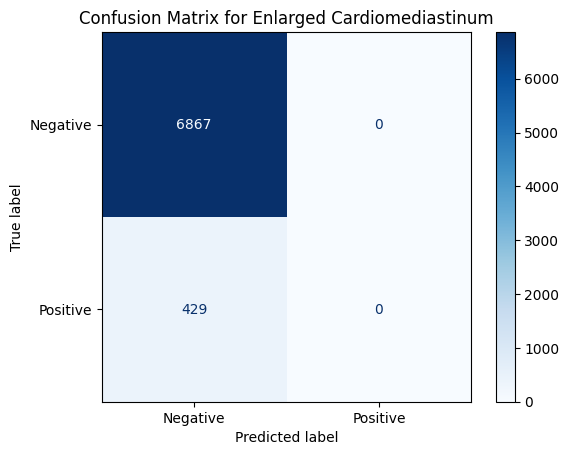

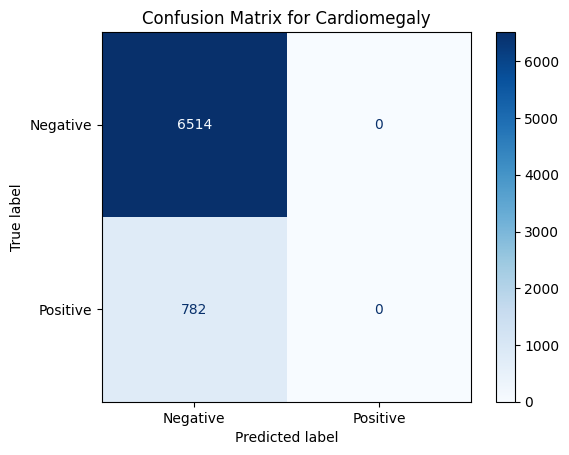

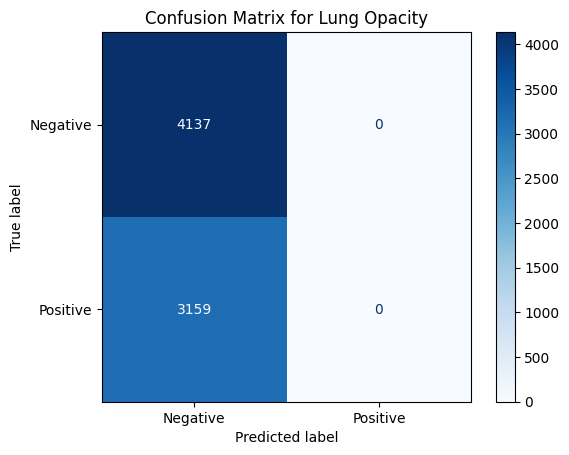

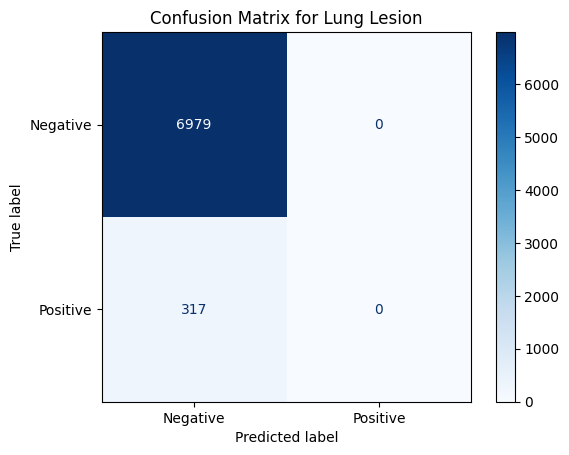

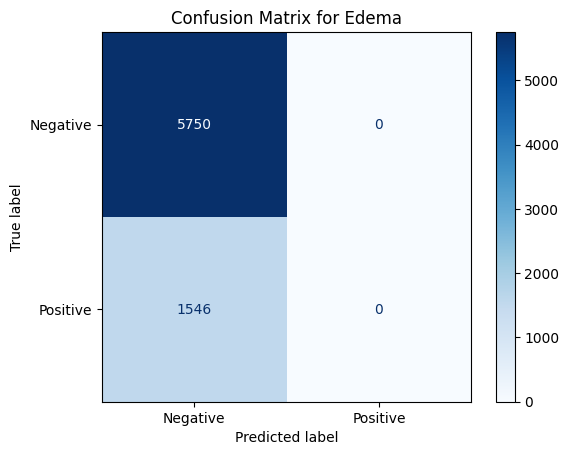

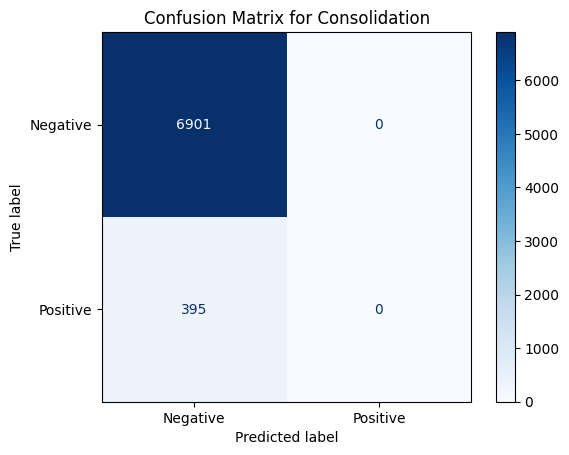

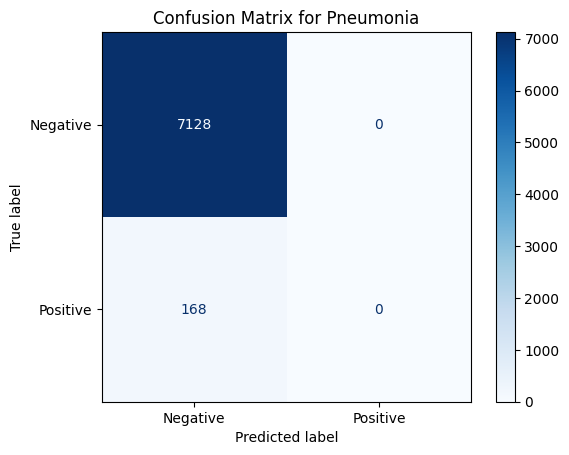

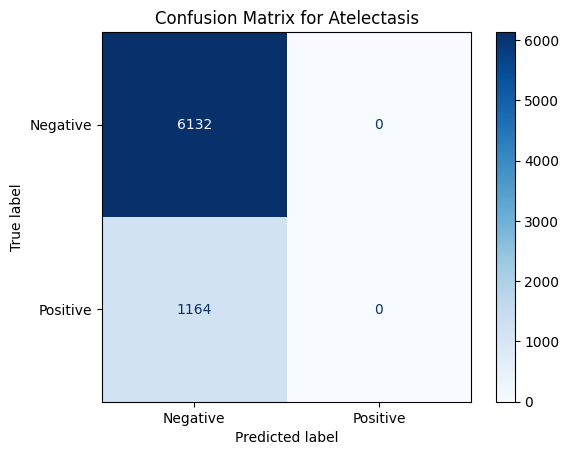

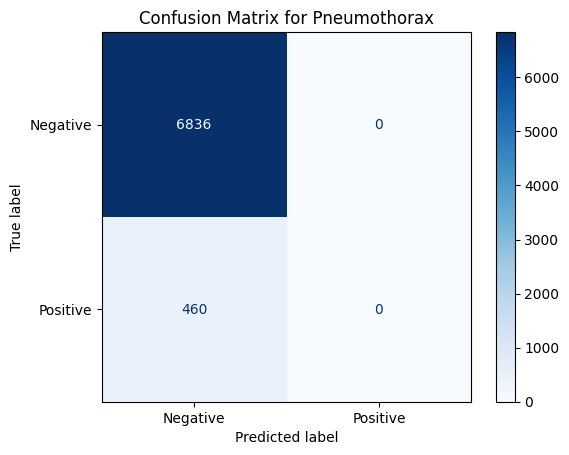

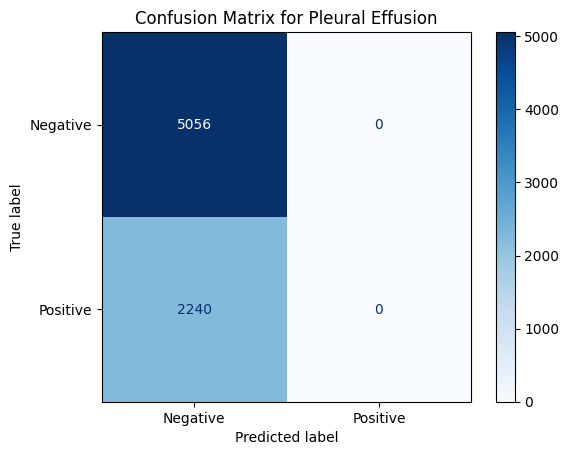

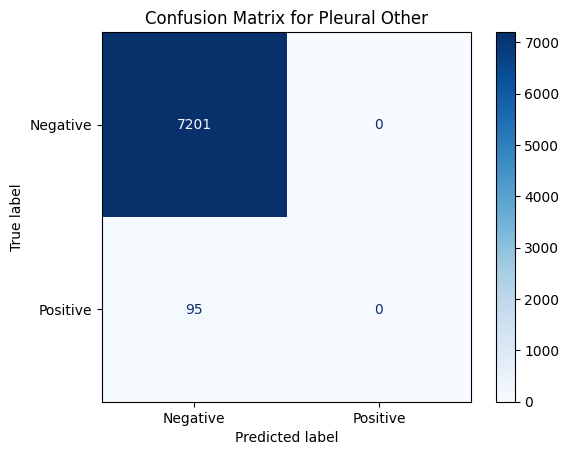

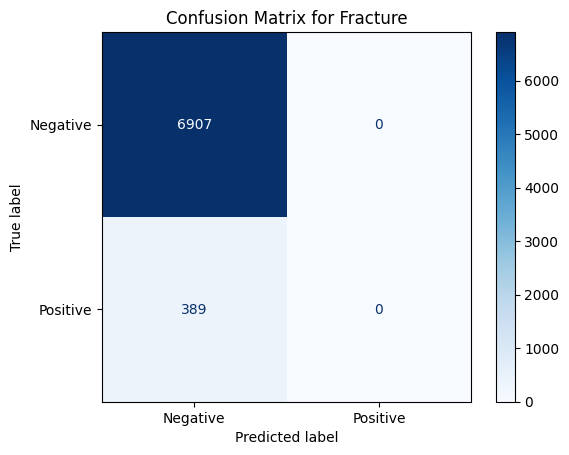

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ✅ Define pathology names (same order as dataset)
pathology_columns = [
    "Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity", "Lung Lesion", "Edema",
    "Consolidation", "Pneumonia", "Atelectasis", "Pneumothorax", "Pleural Effusion",
    "Pleural Other", "Fracture"
]

# Initialize lists to store predictions and labels
all_preds = []
all_labels = []

# ✅ Collect predictions and labels
model.eval()
with torch.no_grad():
    for images, labels in val_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = (outputs > 0.5).float()  # Apply threshold for binary predictions
        all_preds.append(preds.cpu())
        all_labels.append(labels.cpu())

# ✅ Concatenate all predictions and labels
all_preds = torch.cat(all_preds).numpy()
all_labels = torch.cat(all_labels).numpy()

# ✅ Calculate and plot confusion matrix for each pathology
num_classes = all_labels.shape[1]  # Number of pathologies
for i in range(num_classes):
    # Get predictions and labels for the current pathology
    preds = all_preds[:, i]
    labels = all_labels[:, i]

    # Calculate confusion matrix
    cm = confusion_matrix(labels, preds)

    # Plot confusion matrix with real pathology name
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {pathology_columns[i]}")  # ✅ Use real name
    plt.show()


In [ ]:
# Inspect the first batch of labels
for images, labels in train_dataloader:
    print(labels)  # Print the labels tensor
    break

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])


In [ ]:
import pandas as pd

# Load the CSV file
csv_file = "/content/drive/MyDrive/Diagnovision/filtered_df/train_df.csv"
df = pd.read_csv(csv_file)

# Print the column headers
print(df.columns)

Index(['path_to_image', 'deid_patient_id', 'Enlarged Cardiomediastinum',
       'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation',
       'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion',
       'Pleural Other', 'Fracture', 'clean_impression'],
      dtype='object')


In [ ]:
# Define pathology columns
pathology_columns = [
    "Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity", "Lung Lesion", "Edema",
    "Consolidation", "Pneumonia", "Atelectasis", "Pneumothorax", "Pleural Effusion",
    "Pleural Other", "Fracture"
]

for i, pathology in enumerate(pathology_columns):
    print(f"Index {i}: {pathology}")


Index 0: Enlarged Cardiomediastinum
Index 1: Cardiomegaly
Index 2: Lung Opacity
Index 3: Lung Lesion
Index 4: Edema
Index 5: Consolidation
Index 6: Pneumonia
Index 7: Atelectasis
Index 8: Pneumothorax
Index 9: Pleural Effusion
Index 10: Pleural Other
Index 11: Fracture


## **Checking classes imbalance**

In [ ]:
# Define dataset paths
base_path = "/content/drive/MyDrive/Diagnovision/filtered_df"
csv_files = {
    "train": os.path.join(base_path, "train_df.csv"),
    "val": os.path.join(base_path, "val_df.csv"),
    "test": os.path.join(base_path, "test_df.csv")
}

# Load datasets
train_df = pd.read_csv(csv_files["train"])



# Count the number of positive and negative cases per pathology
positive_counts = train_df[pathology_columns].sum()
negative_counts = (train_df.shape[0] - positive_counts)

# Print results
print("Positive cases per pathology:\n", positive_counts)
print("\nNegative cases per pathology:\n", negative_counts)


Positive cases per pathology:
 Enlarged Cardiomediastinum     1948.0
Cardiomegaly                   3623.0
Lung Opacity                  14742.0
Lung Lesion                    1334.0
Edema                          7396.0
Consolidation                  1837.0
Pneumonia                       872.0
Atelectasis                    5437.0
Pneumothorax                   2274.0
Pleural Effusion              10465.0
Pleural Other                   384.0
Fracture                       1773.0
dtype: float64

Negative cases per pathology:
 Enlarged Cardiomediastinum    32100.0
Cardiomegaly                  30425.0
Lung Opacity                  19306.0
Lung Lesion                   32714.0
Edema                         26652.0
Consolidation                 32211.0
Pneumonia                     33176.0
Atelectasis                   28611.0
Pneumothorax                  31774.0
Pleural Effusion              23583.0
Pleural Other                 33664.0
Fracture                      32275.0
dtype: flo

In [ ]:
imbalance_ratio = negative_counts / positive_counts
print(imbalance_ratio)


Enlarged Cardiomediastinum    16.478439
Cardiomegaly                   8.397737
Lung Opacity                   1.309592
Lung Lesion                   24.523238
Edema                          3.603569
Consolidation                 17.534567
Pneumonia                     38.045872
Atelectasis                    5.262277
Pneumothorax                  13.972735
Pleural Effusion               2.253512
Pleural Other                 87.666667
Fracture                      18.203610
dtype: float64


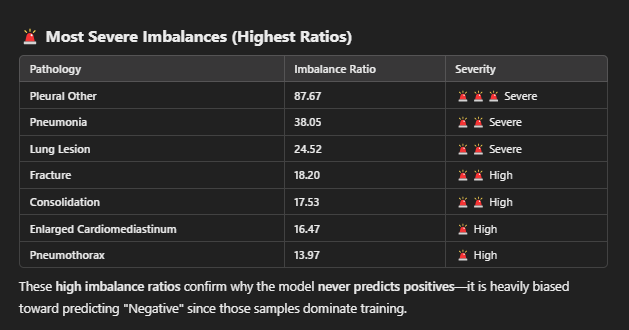

# **Class imbalance**

Observations:
Severe Class Imbalance

Some classes have very few positive samples (e.g., Pleural Other has only 384 positive cases, which is 1.13% of total samples).
Others, like Lung Opacity (43.3%) and Pleural Effusion (30.7%), have more balanced distributions.
Negative Samples Dominate

Most labels are overwhelmingly negative (above 90% for several classes), meaning the model might overfit to predicting negatives and fail to learn meaningful patterns for positives.

**To ensure the model learns properly from imbalanced data, we need to:**

Fix pos_weight Scaling → Cap values to prevent extreme imbalance.
Apply Resampling (Upsampling & Downsampling)
Upsample rare classes to have more positive examples.
Downsample extremely dominant negative classes.
Adjust Learning Rate & Scheduler
Keep AdamW(lr=5e-5, weight_decay=0.01) but fine-tune dynamically.
Use CosineAnnealingLR for better adaptation.
Apply Stronger Data Augmentation to improve generalization.
Ensure Best Threshold Selection Every 5 Epochs for better decision boundaries.

                                                 Class  Positive Samples  \
Enlarged Cardiomediastinum  Enlarged Cardiomediastinum              1948   
Cardiomegaly                              Cardiomegaly              3623   
Lung Opacity                              Lung Opacity             14742   
Lung Lesion                                Lung Lesion              1334   
Edema                                            Edema              7396   
Consolidation                            Consolidation              1837   
Pneumonia                                    Pneumonia               872   
Atelectasis                                Atelectasis              5437   
Pneumothorax                              Pneumothorax              2274   
Pleural Effusion                      Pleural Effusion             10465   
Pleural Other                            Pleural Other               384   
Fracture                                      Fracture              1773   

           

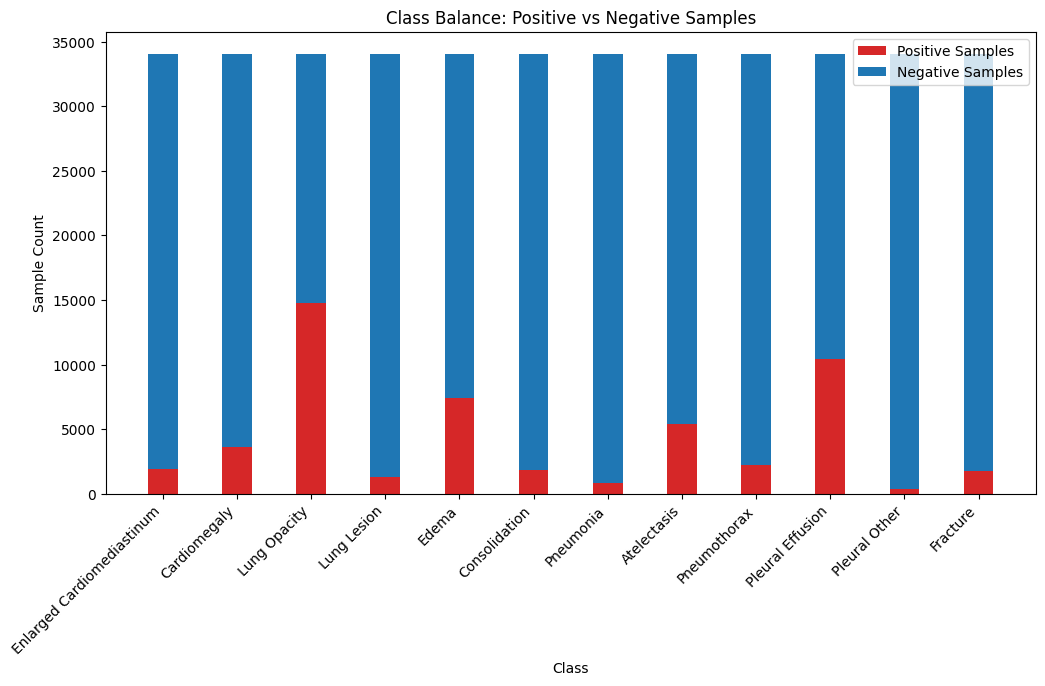

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Calculate positive and negative samples
positive_samples = df_labels_numeric.sum(axis=0)
total_samples = len(df_labels_numeric)
negative_samples = total_samples - positive_samples

# ✅ Create DataFrame for reference
class_balance_df = pd.DataFrame({
    "Class": df_labels_numeric.columns,
    "Positive Samples": positive_samples.astype(int),
    "Negative Samples": negative_samples.astype(int),
    "Positive Ratio": (positive_samples / total_samples).round(4),
    "Negative Ratio": (negative_samples / total_samples).round(4)
})

# ✅ Print the class balance table
print(class_balance_df)

# ✅ Create bar plot
fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(class_balance_df))  # Class indices

ax.bar(x, class_balance_df["Positive Samples"], width=0.4, label="Positive Samples", color="tab:red")
ax.bar(x, class_balance_df["Negative Samples"], width=0.4, bottom=class_balance_df["Positive Samples"], label="Negative Samples", color="tab:blue")

# ✅ Formatting
ax.set_xlabel("Class")
ax.set_ylabel("Sample Count")
ax.set_title("Class Balance: Positive vs Negative Samples")
ax.set_xticks(x)
ax.set_xticklabels(class_balance_df["Class"], rotation=45, ha="right")
ax.legend()

# ✅ Show plot
plt.show()


# **Fixing class imbalance in train**

Ensures each class has at least min_samples (default 50)

Oversamples rare classes to avoid them being ignored.

Undersamples dominant classes to reduce imbalance.

Prevents empty classes that cause the error.


# **Training loop - DENSENET121**

In [4]:
# Tensors (Preprocessed Images)
tensor_save_folder = "/content/drive/MyDrive/Diagnovision/preprocessed_tensors"

# CSV Labels (Pathologies)
train_csv = "/content/drive/MyDrive/Diagnovision/filtered_df/train_df.csv"
val_csv = "/content/drive/MyDrive/Diagnovision/filtered_df/val_df.csv"

# Folder to Save Trained Models
model_save_folder = "/content/drive/MyDrive/Diagnovision/modelo_img/best_models"


In [12]:
import numpy as np

all_train_labels = []
for _, labels in train_dataloader:
    all_train_labels.append(labels.numpy())

all_train_labels = np.vstack(all_train_labels)  # Convert to NumPy array
label_counts = np.sum(all_train_labels, axis=0)  # Count occurrences per class
class_weights = 1.0 / (label_counts + 1e-6)  # Avoid division by zero
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)


In [39]:
# Check Tensor Shapes Before Training
for images, labels in train_dataloader:
    print(f"Image batch shape: {images.shape}")  # Expected: (batch_size, 3, 224, 224)
    print(f"Labels batch shape: {labels.shape}")  # Expected: (batch_size, 12)
    break


Image batch shape: torch.Size([12, 3, 224, 224])
Labels batch shape: torch.Size([12, 12])


In [36]:
print(f"pos_weight shape: {pos_weight.shape}")


pos_weight shape: torch.Size([12])


In [81]:
import pandas as pd
import torch

# ✅ Load dataset
df_labels = pd.read_csv("/content/drive/MyDrive/Diagnovision/filtered_df/train_df.csv")

# ✅ Select only label columns (excluding 'path_to_image' and 'clean_impression')
label_columns = df_labels.columns.difference(['path_to_image', 'clean_impression'])

# ✅ Convert labels to numeric and clip values (ensuring they are between 0 and 1)
df_labels[label_columns] = df_labels[label_columns].apply(pd.to_numeric, errors='coerce')
df_labels[label_columns] = df_labels[label_columns].clip(0, 1)

# ✅ Balancing function
def balance_dataset(df, min_pos_samples=50, max_neg_samples=5000):
    balanced_df = []

    for col in label_columns:
        pos_samples = df[df[col] == 1]
        neg_samples = df[df[col] == 0]

        # ✅ Ensure class has positive samples
        if pos_samples.empty:
            print(f"WARNING: No positive samples for '{col}'. Keeping all negatives.")
            balanced_df.append(neg_samples)
            continue

        # ✅ Upsample positive samples if needed
        if len(pos_samples) < 5000:
            pos_samples = pos_samples.sample(7000, replace=True, random_state=42)

        # ✅ Downsample negative samples if needed
        if len(neg_samples) > max_neg_samples:
            neg_samples = neg_samples.sample(max_neg_samples, replace=False, random_state=42)

        balanced_df.append(pd.concat([pos_samples, neg_samples]))

    return pd.concat(balanced_df).drop_duplicates().reset_index(drop=True)

# ✅ Apply balancing
df_labels = balance_dataset(df_labels)

# ✅ Recalculate `pos_weight`
label_counts = df_labels[label_columns].sum(axis=0).values.astype(float)
pos_weight = torch.tensor((1.0 / (label_counts + 1e-6)), dtype=torch.float32).to("cuda" if torch.cuda.is_available() else "cpu")


In [74]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm import tqdm
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, Dataset

# ✅ Configurar dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Data Augmentation Mejorado
train_transform = transforms.Compose([
    transforms.RandomRotation(degrees=20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=15, scale=(0.7, 1.3), shear=15),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.3),
    transforms.RandomErasing(p=0.3, scale=(0.02, 0.2)),  # More aggressive
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ✅ Cargar DenseNet121 preentrenado en ImageNet
model = models.densenet121(weights="IMAGENET1K_V1")
model.classifier = nn.Linear(model.classifier.in_features, 12, bias=True)
model.to(device)

# ✅ Apply Xavier Initialization (Only for Linear & Conv Layers)
for name, param in model.named_parameters():
    if 'weight' in name and len(param.shape) > 1:
        nn.init.xavier_uniform_(param)

# ✅ Load dataset
df_labels = pd.read_csv("/content/drive/MyDrive/Diagnovision/filtered_df/train_df.csv")

# ✅ Select only label columns
label_columns = df_labels.columns.difference(['path_to_image', 'clean_impression'])

# ✅ Convert to numeric and clip values (ensuring labels are between 0 and 1)
df_labels[label_columns] = df_labels[label_columns].apply(pd.to_numeric, errors='coerce')
df_labels[label_columns] = df_labels[label_columns].clip(0, 1)

# ✅ Apply balancing function
df_labels = balance_dataset(df_labels)

# ✅ Recalculate `pos_weight`
label_counts = df_labels[label_columns].sum(axis=0).values.astype(float)
pos_weight = torch.tensor((1.0 / (label_counts + 1e-6)), dtype=torch.float32).clip(1,10).to(device)

# ✅ Define loss function with `pos_weight`
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

# ✅ Optimizer and Scheduler
optimizer = optim.AdamW(model.parameters(), lr=5e-5, weight_decay=0.01)
scheduler = CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)

# ✅ Training parameters
num_epochs = 35
best_val_loss = float("inf")
best_threshold = 0.5
patience = 5
early_stop_counter = 0

# ✅ Load Checkpoint if available
checkpoint_path = "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/checkpoint_densenet.pth"
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint["model_state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
    scheduler.load_state_dict(checkpoint["scheduler_state_dict"])
    epoch = checkpoint["epoch"]
    best_val_loss = checkpoint["best_val_loss"]
    best_threshold = checkpoint["best_threshold"]
    early_stop_counter = checkpoint["early_stop_counter"]
    print(f"Resuming training from epoch {epoch+1}...")
else:
    epoch = 0
    print("Starting training from scratch...")

# ✅ Training Loop
for epoch in range(epoch, num_epochs):
    model.train()
    train_loss = 0.0

    for images, labels in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs} (Train)"):
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        train_loss += loss.item()

    # ✅ Validation
    model.eval()
    val_loss = 0.0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in tqdm(val_dataloader, desc=f"Epoch {epoch+1}/{num_epochs} (Val)"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            probs = torch.sigmoid(outputs)

            # ✅ Dynamic Thresholding
            if epoch % 5 == 0:
                best_threshold = np.linspace(0.1, 0.9, 9)[np.argmax([f1_score(labels.cpu().numpy(), probs.cpu().numpy() > t, average="micro", zero_division=0) for t in np.linspace(0.1, 0.9, 9)])]

            preds = probs > best_threshold
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    # ✅ Print Metrics
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_dataloader):.6f}, Val Loss: {val_loss/len(val_dataloader):.6f}")

    scheduler.step()

    # ✅ Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/densenet_best.pth")
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping!")
            break


Starting training from scratch...


Epoch 1/35 (Val): 100%|██████████| 228/228 [00:30<00:00,  7.58it/s]


Epoch 1/35, Train Loss: 0.329166, Val Loss: 0.320978


Epoch 2/35 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.81it/s]


Epoch 2/35, Train Loss: 0.320083, Val Loss: 0.320804


Epoch 3/35 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.79it/s]


Epoch 3/35, Train Loss: 0.319789, Val Loss: 0.320003


Epoch 4/35 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.81it/s]


Epoch 4/35, Train Loss: 0.319584, Val Loss: 0.320236


Epoch 5/35 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.81it/s]


Epoch 5/35, Train Loss: 0.319459, Val Loss: 0.320058


Epoch 6/35 (Val): 100%|██████████| 228/228 [00:30<00:00,  7.58it/s]


Epoch 6/35, Train Loss: 0.319228, Val Loss: 0.320190


Epoch 7/35 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.81it/s]


Epoch 7/35, Train Loss: 0.318767, Val Loss: 0.319992


Epoch 8/35 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.80it/s]


Epoch 8/35, Train Loss: 0.318355, Val Loss: 0.319893


Epoch 9/35 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.82it/s]


Epoch 9/35, Train Loss: 0.317876, Val Loss: 0.319990


Epoch 10/35 (Val): 100%|██████████| 228/228 [00:26<00:00,  8.76it/s]


Epoch 10/35, Train Loss: 0.317430, Val Loss: 0.320055


Epoch 11/35 (Val): 100%|██████████| 228/228 [00:30<00:00,  7.58it/s]


Epoch 11/35, Train Loss: 0.317184, Val Loss: 0.320034


Epoch 12/35 (Val): 100%|██████████| 228/228 [00:26<00:00,  8.76it/s]


Epoch 12/35, Train Loss: 0.317087, Val Loss: 0.320166


Epoch 13/35 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.79it/s]

Epoch 13/35, Train Loss: 0.316997, Val Loss: 0.320339
Early stopping!


In [75]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ✅ Load the trained model
model_path = "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/densenet_best.pth"
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# ✅ Initialize lists for predictions and true labels
all_labels = []
all_preds = []

# ✅ Run inference on validation set
with torch.no_grad():
    for images, labels in tqdm(val_dataloader, desc="Evaluating Model on Validation Set"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        # Convert outputs to probabilities
        probs = torch.sigmoid(outputs)

        # Apply threshold (default 0.3 or dynamically computed)
        preds = probs > 0.3

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# ✅ Convert lists to NumPy arrays
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

# ✅ Compute final metrics
accuracy = accuracy_score(all_labels, all_preds)
precision_micro = precision_score(all_labels, all_preds, average="micro", zero_division=0)
recall_micro = recall_score(all_labels, all_preds, average="micro", zero_division=0)
f1_micro = f1_score(all_labels, all_preds, average="micro", zero_division=0)

# ✅ Print results
print("\n🔹 **FINAL VALIDATION METRICS** 🔹")
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Precision (Micro): {precision_micro:.4f}")
print(f"Validation Recall (Micro): {recall_micro:.4f}")
print(f"Validation F1 Score (Micro): {f1_micro:.4f}")


<ipython-input-75-a3518b94261a>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))
Evaluating Model on Valid


🔹 **FINAL VALIDATION METRICS** 🔹
Validation Accuracy: 8.33%
Validation Precision (Micro): 0.3806
Validation Recall (Micro): 0.4340
Validation F1 Score (Micro): 0.4055


In [76]:
final_model_path = "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/densenet_final.pth"
torch.save(model.state_dict(), final_model_path)
print(f"✅ Final model saved at: {final_model_path}")


✅ Final model saved at: /content/drive/MyDrive/Diagnovision/modelo_img/best_models/densenet_final.pth


## **EfficientNetV2 v2**


In [83]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm import tqdm
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, Dataset

# ✅ Configure device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Data Augmentation
train_transform = transforms.Compose([
    transforms.RandomRotation(degrees=20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=15, scale=(0.7, 1.3), shear=15),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.3),
    transforms.RandomErasing(p=0.3, scale=(0.02, 0.2)),  # More aggressive
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ✅ Load EfficientNetV2-S pretrained on ImageNet
model = models.efficientnet_v2_s(weights="IMAGENET1K_V1")
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 12)
model.to(device)

# ✅ Xavier Initialization (Only for Linear & Conv Layers)
for name, param in model.named_parameters():
    if 'classifier' in name and 'weight' in name:
        nn.init.xavier_uniform_(param)


# ✅ Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)




# ✅ Class Balancing Function
def balance_dataset(df, upsample=True, downsample=True, min_pos_samples=2000):
    balanced_df = []
    label_columns = [col for col in df.columns if col not in ["path_to_image", "clean_impression"]]

    for col in label_columns:
        pos_samples = df[df[col] == 1]
        neg_samples = df[df[col] == 0]

        if len(pos_samples) == 0 or len(neg_samples) == 0:
            balanced_df.append(df)
            continue

        # ✅ Upsampling minority classes
        if upsample and len(pos_samples) < min_pos_samples:
            pos_samples = pos_samples.sample(min_pos_samples, replace=True, random_state=42)

        # ✅ Downsampling majority classes
        max_neg_samples = min(len(neg_samples), min_pos_samples * 3)
        neg_samples = neg_samples.sample(max_neg_samples, replace=False, random_state=42)

        balanced_df.append(pd.concat([pos_samples, neg_samples]))

    return pd.concat(balanced_df).drop_duplicates().reset_index(drop=True)

# ✅ Apply class balancing
df_labels = balance_dataset(df_labels)

# ✅ Recalculate `pos_weight`
label_columns = [col for col in df_labels.columns if col not in ["path_to_image", "clean_impression"]]
df_labels[label_columns] = df_labels[label_columns].apply(pd.to_numeric, errors='coerce')
pos_weight = torch.tensor((1.0 / (label_counts + 1)), dtype=torch.float32).to(device)

# ✅ Define loss function with pos_weight
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

# ✅ Optimizer & Scheduler
optimizer = optim.AdamW(model.parameters(), lr=5e-6, weight_decay=0.01)
scheduler = CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)

# ✅ Training Parameters
num_epochs = 20
best_val_loss = float("inf")
best_threshold = 0.5
patience = 5
early_stop_counter = 0

# ✅ Checkpoint Path
checkpoint_path = "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/checkpoint_efficientv2.pth"
best_model_path = "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/efficientv2_best.pth"

# ✅ Resume training if checkpoint exists
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint["model_state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
    scheduler.load_state_dict(checkpoint["scheduler_state_dict"])
    epoch = checkpoint["epoch"]
    best_val_loss = checkpoint["best_val_loss"]
    best_threshold = checkpoint["best_threshold"]
    early_stop_counter = checkpoint["early_stop_counter"]
    print(f"✅ Resuming training from epoch {epoch+1}...")
else:
    epoch = 0
    print("🚀 Starting training from scratch...")

# ✅ Training Loop
for epoch in range(epoch, num_epochs):
    model.train()
    train_loss = 0.0

    for images, labels in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs} (Train)"):
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient Clipping
        optimizer.step()

        train_loss += loss.item()

    # ✅ Validation Loop
    model.eval()
    val_loss = 0.0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in tqdm(val_dataloader, desc=f"Epoch {epoch+1}/{num_epochs} (Val)"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            probs = torch.sigmoid(outputs)

            # **Dynamic Thresholding**
            if epoch % 5 == 0:
                best_threshold = np.linspace(0.1, 0.9, 9)[np.argmax([f1_score(labels.cpu().numpy(), probs.cpu().numpy() > t, average="micro", zero_division=0) for t in np.linspace(0.1, 0.9, 9)])]

            preds = probs > best_threshold
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())

    # ✅ Compute Metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision_micro = precision_score(all_labels, all_preds, average="micro", zero_division=0)
    recall_micro = recall_score(all_labels, all_preds, average="micro", zero_division=0)
    f1_micro = f1_score(all_labels, all_preds, average="micro", zero_division=0)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_dataloader):.6f}, Val Loss: {val_loss/len(val_dataloader):.6f}")
    print(f"Validation Accuracy: {accuracy * 100:.2f}% | Best Threshold: {best_threshold:.2f}")
    print(f"Validation Precision (Micro): {precision_micro:.4f}")
    print(f"Validation Recall (Micro): {recall_micro:.4f}")
    print(f"Validation F1 Score (Micro): {f1_micro:.4f}")

    scheduler.step()

    # ✅ Save Best Model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), best_model_path)
        print("✅ Saved best model!")
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("⏳ Early stopping!")
            break

print("🎯 Training complete!")

final_model_path = "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/efficientv2_final.pth"
torch.save(model.state_dict(), final_model_path)
print(f"✅ Final model saved at: {final_model_path}")



🚀 Starting training from scratch...


Epoch 1/20 (Val): 100%|██████████| 228/228 [00:27<00:00,  8.17it/s]


Epoch 1/20, Train Loss: 0.063958, Val Loss: 0.002906
Validation Accuracy: 21.75% | Best Threshold: 0.10
Validation Precision (Micro): 0.0000
Validation Recall (Micro): 0.0000
Validation F1 Score (Micro): 0.0000
✅ Saved best model!


Epoch 2/20 (Val): 100%|██████████| 228/228 [00:23<00:00,  9.51it/s]


Epoch 2/20, Train Loss: 0.001879, Val Loss: 0.001245
Validation Accuracy: 21.75% | Best Threshold: 0.10
Validation Precision (Micro): 0.0000
Validation Recall (Micro): 0.0000
Validation F1 Score (Micro): 0.0000
✅ Saved best model!


Epoch 3/20 (Val):  98%|█████████▊| 223/228 [00:23<00:00,  9.44it/s]


KeyboardInterrupt: 

In [78]:
print(df_labels.iloc[:, 1:].describe())


       Enlarged Cardiomediastinum  Cardiomegaly  Lung Opacity   Lung Lesion  \
count                33524.000000  33524.000000  33524.000000  33524.000000   
mean                     0.057780      0.108072      0.439745      0.039584   
std                      0.233329      0.310476      0.496363      0.194982   
min                      0.000000      0.000000      0.000000      0.000000   
25%                      0.000000      0.000000      0.000000      0.000000   
50%                      0.000000      0.000000      0.000000      0.000000   
75%                      0.000000      0.000000      1.000000      0.000000   
max                      1.000000      1.000000      1.000000      1.000000   

              Edema  Consolidation     Pneumonia   Atelectasis  Pneumothorax  \
count  33524.000000   33524.000000  33524.000000  33524.000000  33524.000000   
mean       0.220618       0.054558      0.025892      0.162182      0.067832   
std        0.414670       0.227119      0.158815

## **going back to first model**

In [88]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, Dataset

# ✅ Ensure correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Data Augmentation
train_transform = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=5, scale=(0.9, 1.1), shear=5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# ✅ Load EfficientNetV2
model = models.efficientnet_v2_s(weights="IMAGENET1K_V1")
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 12)  # 12 classes
model.to(device)

# ✅ Load Dataset
df_labels = pd.read_csv("/content/drive/MyDrive/Diagnovision/filtered_df/train_df.csv")

# ✅ Ensure labels are numeric and between 0 and 1
df_labels.iloc[:, 1:-1] = df_labels.iloc[:, 1:-1].apply(pd.to_numeric, errors='coerce').clip(0, 1)

# ✅ Rebalance Dataset
def balance_dataset(df, min_pos_samples=50):
    balanced_df = []
    label_columns = [col for col in df.columns if col not in ["path_to_image", "clean_impression"]]

    for col in label_columns:
        pos_samples = df[df[col] == 1]
        neg_samples = df[df[col] == 0]

        if len(pos_samples) == 0:
            balanced_df.append(neg_samples)
            continue

        if len(neg_samples) == 0:
            balanced_df.append(pos_samples)
            continue

        # Upsample positives
        if len(pos_samples) < min_pos_samples:
            pos_samples = pos_samples.sample(min_pos_samples, replace=True, random_state=42)

        # Downsample negatives
        neg_samples = neg_samples.sample(min(len(neg_samples), min_pos_samples * 3), replace=False, random_state=42)

        balanced_df.append(pd.concat([pos_samples, neg_samples]))

    return pd.concat(balanced_df).drop_duplicates().reset_index(drop=True)

df_labels = balance_dataset(df_labels)

# ✅ Recalculate pos_weight
label_counts = df_labels.iloc[:, 1:-1].sum(axis=0).values.astype(float)
pos_weight = torch.tensor((1.0 / (label_counts + 1e-6)), dtype=torch.float32).to(device)

# ✅ Define Loss Function
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

# ✅ Optimizer & Scheduler
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.1)

# ✅ Training Loop
num_epochs = 20
best_val_loss = float("inf")
patience = 5
early_stop_counter = 0
checkpoint_path = "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/effv3_checkpoint.pth"

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    for images, labels in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs} (Train)"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # ✅ Validation Phase
    model.eval()
    val_loss = 0.0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, labels in tqdm(val_dataloader, desc=f"Epoch {epoch+1}/{num_epochs} (Val)"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            probs = torch.sigmoid(outputs)

            # ✅ **Dynamic Thresholding Per Class**
            thresholds = np.linspace(0.1, 0.5, 5)  # Test different thresholds
            best_f1 = 0
            best_threshold = 0.3

            for t in thresholds:
                preds = (probs > t).cpu().numpy()
                f1 = f1_score(labels.cpu().numpy(), preds, average="macro", zero_division=0)
                if f1 > best_f1:
                    best_f1 = f1
                    best_threshold = t

            preds = (probs > best_threshold).cpu().numpy()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds)

    # ✅ Compute Validation Metrics
    val_precision = precision_score(all_labels, all_preds, average="macro", zero_division=0)
    val_recall = recall_score(all_labels, all_preds, average="macro", zero_division=0)
    val_f1 = f1_score(all_labels, all_preds, average="macro", zero_division=0)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_dataloader):.6f}, Val Loss: {val_loss/len(val_dataloader):.6f}")
    print(f"Validation Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f} (Best Threshold: {best_threshold:.2f})")

    # ✅ Update LR Scheduler
    scheduler.step(val_loss)

    # ✅ Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/efficientv3_best.pth")
        print("Saved best model!")
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping!")
            break

    # ✅ Save Checkpoint
    checkpoint = {
        "epoch": epoch + 1,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "scheduler_state_dict": scheduler.state_dict(),
        "best_val_loss": best_val_loss,
        "early_stop_counter": early_stop_counter
    }
    torch.save(checkpoint, checkpoint_path)
    print("Checkpoint saved!")

print("✅ Training complete!")



final_model_path = "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/efficientv3_final.pth"
torch.save(model.state_dict(), final_model_path)
print(f"✅ Final model saved at: {final_model_path}")

Epoch 1/20 (Val): 100%|██████████| 228/228 [00:26<00:00,  8.64it/s]


Epoch 1/20, Train Loss: 0.014218, Val Loss: 0.000558
Validation Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000 (Best Threshold: 0.30)
Saved best model!
Checkpoint saved!


Epoch 2/20 (Train):  27%|██▋       | 776/2838 [01:52<04:59,  6.87it/s]


KeyboardInterrupt: 

In [2]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load a pretrained model
model = models.efficientnet_v2_s(pretrained=True)

# Modify the final layer for multi-label classification
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 12)  # 12 pathologies

# Move the model to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:05<00:00, 15.2MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [105]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Loss function
criterion = nn.BCEWithLogitsLoss()

# Optimizer
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

# Learning rate scheduler
scheduler =  ReduceLROnPlateau(optimizer, mode="min", factor=0.1, patience=3)

In [91]:
from tqdm import tqdm
import os

num_epochs = 20  # Adjust as needed
best_val_loss = float('inf')
patience = 5  # Number of epochs to wait for improvement
early_stop_counter = 0

# Load checkpoint if it exists
checkpoint_path = "/content/drive/MyDrive/Diagnovision//modelo_img/best_models/checkpointefffin.pth"
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint["model_state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
    scheduler.load_state_dict(checkpoint["scheduler_state_dict"])
    epoch = checkpoint["epoch"]
    best_val_loss = checkpoint["best_val_loss"]
    early_stop_counter = checkpoint["early_stop_counter"]
    print(f"Resuming training from epoch {epoch+1}...")
else:
    epoch = 0
    print("Starting training from scratch...")

for epoch in range(epoch, num_epochs):
    model.train()
    train_loss = 0.0
    for images, labels in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs} (Train)"):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_dataloader, desc=f"Epoch {epoch+1}/{num_epochs} (Val)"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    # Print losses
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_dataloader)}, Val Loss: {val_loss/len(val_dataloader)}")

    # Learning rate scheduler step
    scheduler.step(val_loss)

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/efficien3.pth")
        print("Saved best model!")
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping!")
            break

    # Save checkpoint
    checkpoint = {
        "epoch": epoch + 1,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "scheduler_state_dict": scheduler.state_dict(),
        "best_val_loss": best_val_loss,
        "early_stop_counter": early_stop_counter
    }
    torch.save(checkpoint, checkpoint_path)
    print("Checkpoint saved!")



final_model_path = "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/efficientv3final.pth"
torch.save(model.state_dict(), final_model_path)
print(f"✅ Final model saved at: {final_model_path}")

Starting training from scratch...


Epoch 1/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.43it/s]


Epoch 1/20, Train Loss: 0.3235471452086891, Val Loss: 0.32241698720476086
Saved best model!
Checkpoint saved!


Epoch 2/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.48it/s]


Epoch 2/20, Train Loss: 0.32139336024269916, Val Loss: 0.32078838328781883
Saved best model!
Checkpoint saved!


Epoch 3/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.40it/s]


Epoch 3/20, Train Loss: 0.32075365829669394, Val Loss: 0.32062148119796785
Saved best model!
Checkpoint saved!


Epoch 4/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.44it/s]


Epoch 4/20, Train Loss: 0.3203984032410648, Val Loss: 0.320143509394767
Saved best model!
Checkpoint saved!


Epoch 5/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.47it/s]


Epoch 5/20, Train Loss: 0.32023244232485376, Val Loss: 0.32056658682331707
Checkpoint saved!


Epoch 6/20 (Val): 100%|██████████| 228/228 [00:23<00:00,  9.50it/s]


Epoch 6/20, Train Loss: 0.3200293460662639, Val Loss: 0.32046442413539217
Checkpoint saved!


Epoch 7/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.50it/s]


Epoch 7/20, Train Loss: 0.31997290620130076, Val Loss: 0.32012963438766046
Saved best model!
Checkpoint saved!


Epoch 8/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.46it/s]


Epoch 8/20, Train Loss: 0.3198871614018992, Val Loss: 0.3201972629156029
Checkpoint saved!


Epoch 9/20 (Val): 100%|██████████| 228/228 [00:23<00:00,  9.50it/s]


Epoch 9/20, Train Loss: 0.3192406162840115, Val Loss: 0.31945252313948513
Saved best model!
Checkpoint saved!


Epoch 10/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.44it/s]


Epoch 10/20, Train Loss: 0.31919741520816963, Val Loss: 0.3194177827814169
Saved best model!
Checkpoint saved!


Epoch 11/20 (Val): 100%|██████████| 228/228 [00:23<00:00,  9.52it/s]


Epoch 11/20, Train Loss: 0.31913998012100836, Val Loss: 0.3195115864407598
Checkpoint saved!


Epoch 12/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.46it/s]


Epoch 12/20, Train Loss: 0.3192177031338845, Val Loss: 0.3194592651960097
Checkpoint saved!


Epoch 13/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.40it/s]


Epoch 13/20, Train Loss: 0.31916806479316095, Val Loss: 0.31948167151003554
Checkpoint saved!


Epoch 14/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.47it/s]


Epoch 14/20, Train Loss: 0.3192707925268342, Val Loss: 0.3194144275366214
Saved best model!
Checkpoint saved!


Epoch 15/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.47it/s]


Epoch 15/20, Train Loss: 0.3191154830163007, Val Loss: 0.31940194742198574
Saved best model!
Checkpoint saved!


Epoch 16/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.48it/s]


Epoch 16/20, Train Loss: 0.31911488863428855, Val Loss: 0.31940643972994986
Checkpoint saved!


Epoch 17/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.49it/s]


Epoch 17/20, Train Loss: 0.3191976003333076, Val Loss: 0.3194081780680439
Checkpoint saved!


Epoch 18/20 (Val): 100%|██████████| 228/228 [00:23<00:00,  9.53it/s]


Epoch 18/20, Train Loss: 0.3190919807767515, Val Loss: 0.3194111481701073
Checkpoint saved!


Epoch 19/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.49it/s]


Epoch 19/20, Train Loss: 0.31910377863198625, Val Loss: 0.3194084156369954
Checkpoint saved!


Epoch 20/20 (Val): 100%|██████████| 228/228 [00:24<00:00,  9.47it/s]


Epoch 20/20, Train Loss: 0.31912729451780675, Val Loss: 0.31940707564353943
Early stopping!
✅ Final model saved at: /content/drive/MyDrive/Diagnovision/modelo_img/best_models/efficientv3_final.pth


In [101]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

# ✅ Load the trained model
model_path = "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/efficient1.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Load model
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)
model.eval()

# ✅ Evaluate on Validation Set
all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in tqdm(val_dataloader, desc="Evaluating Model on Validation Set"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        probs = torch.sigmoid(outputs)
        preds = (probs > 0.3).cpu().numpy()  # Use the same threshold from training

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds)
        all_probs.extend(probs.cpu().numpy())

# ✅ Compute Metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average="macro", zero_division=0)
recall = recall_score(all_labels, all_preds, average="macro", zero_division=0)
f1 = f1_score(all_labels, all_preds, average="macro", zero_division=0)

# ✅ Print Metrics
print("\n🔹 **FINAL VALIDATION METRICS** 🔹")
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Precision (Macro): {precision:.4f}")
print(f"Validation Recall (Macro): {recall:.4f}")
print(f"Validation F1 Score (Macro): {f1:.4f}")


<ipython-input-101-387767bf8ac2>:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))
Evaluating Model on Val


🔹 **FINAL VALIDATION METRICS** 🔹
Validation Accuracy: 7.26%
Validation Precision (Macro): 0.0617
Validation Recall (Macro): 0.1667
Validation F1 Score (Macro): 0.0895


In [106]:
from tqdm import tqdm
import os

num_epochs = 20  # Adjust as needed
best_val_loss = float('inf')
patience = 5  # Number of epochs to wait for improvement
early_stop_counter = 0

# Load checkpoint if it exists
checkpoint_path = "/content/drive/MyDrive/Diagnovision//modelo_img/best_models/checkpoint5.pth"
if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint["model_state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
    scheduler.load_state_dict(checkpoint["scheduler_state_dict"])
    epoch = checkpoint["epoch"]
    best_val_loss = checkpoint["best_val_loss"]
    early_stop_counter = checkpoint["early_stop_counter"]
    print(f"Resuming training from epoch {epoch+1}...")
else:
    epoch = 0
    print("Starting training from scratch...")

for epoch in range(epoch, num_epochs):
    model.train()
    train_loss = 0.0
    for images, labels in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs} (Train)"):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_dataloader, desc=f"Epoch {epoch+1}/{num_epochs} (Val)"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    # Print losses
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_dataloader)}, Val Loss: {val_loss/len(val_dataloader)}")

    # Learning rate scheduler step
    scheduler.step(val_loss)

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/efficient5.pth")
        print("Saved best model!")
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping!")
            break

    # Save checkpoint
    checkpoint = {
        "epoch": epoch + 1,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "scheduler_state_dict": scheduler.state_dict(),
        "best_val_loss": best_val_loss,
        "early_stop_counter": early_stop_counter
    }
    torch.save(checkpoint, checkpoint_path)
    print("Checkpoint saved!")


final_model_path = "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/efficientv5final.pth"
torch.save(model.state_dict(), final_model_path)
print(f"✅ Final model saved at: {final_model_path}")

Starting training from scratch...


Epoch 1/20 (Val): 100%|██████████| 228/228 [00:26<00:00,  8.70it/s]


Epoch 1/20, Train Loss: 0.3236151388081721, Val Loss: 0.3226553595771915
Saved best model!
Checkpoint saved!


Epoch 2/20 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.82it/s]


Epoch 2/20, Train Loss: 0.3211593571485895, Val Loss: 0.3229439891221231
Checkpoint saved!


Epoch 3/20 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.80it/s]


Epoch 3/20, Train Loss: 0.3207242664545669, Val Loss: 0.3217687978686994
Saved best model!
Checkpoint saved!


Epoch 4/20 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.84it/s]


Epoch 4/20, Train Loss: 0.3202811620546698, Val Loss: 0.3198531479166265
Saved best model!
Checkpoint saved!


Epoch 5/20 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.78it/s]


Epoch 5/20, Train Loss: 0.320178850046592, Val Loss: 0.31976199418044926
Saved best model!
Checkpoint saved!


Epoch 6/20 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.84it/s]


Epoch 6/20, Train Loss: 0.3201000879691301, Val Loss: 0.3198006106050391
Checkpoint saved!


Epoch 7/20 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.83it/s]


Epoch 7/20, Train Loss: 0.3199574648966413, Val Loss: 0.32051043356196923
Checkpoint saved!


Epoch 8/20 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.84it/s]


Epoch 8/20, Train Loss: 0.3199476181851717, Val Loss: 0.3198118411788815
Checkpoint saved!


Epoch 9/20 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.81it/s]


Epoch 9/20, Train Loss: 0.31988731148988114, Val Loss: 0.3199006019715677
Checkpoint saved!


Epoch 10/20 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.84it/s]


Epoch 10/20, Train Loss: 0.31932468812616044, Val Loss: 0.3195425690266124
Saved best model!
Checkpoint saved!


Epoch 11/20 (Val): 100%|██████████| 228/228 [00:26<00:00,  8.75it/s]


Epoch 11/20, Train Loss: 0.3192102298077519, Val Loss: 0.319438958115745
Saved best model!
Checkpoint saved!


Epoch 12/20 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.79it/s]


Epoch 12/20, Train Loss: 0.31912989846684714, Val Loss: 0.3194224244277728
Saved best model!
Checkpoint saved!


Epoch 13/20 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.79it/s]


Epoch 13/20, Train Loss: 0.3192196803940611, Val Loss: 0.3194237100450616
Checkpoint saved!


Epoch 14/20 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.80it/s]


Epoch 14/20, Train Loss: 0.31916266401482773, Val Loss: 0.31947307929135205
Checkpoint saved!


Epoch 15/20 (Val): 100%|██████████| 228/228 [00:25<00:00,  8.79it/s]


Epoch 15/20, Train Loss: 0.3191502842687233, Val Loss: 0.31941627155531915
Saved best model!
Checkpoint saved!


Epoch 16/20 (Val): 100%|██████████| 228/228 [00:26<00:00,  8.75it/s]


Epoch 16/20, Train Loss: 0.3190842326087293, Val Loss: 0.31941716274932813
Checkpoint saved!


Epoch 17/20 (Val): 100%|██████████| 228/228 [00:26<00:00,  8.73it/s]


Epoch 17/20, Train Loss: 0.31907971308338884, Val Loss: 0.31942620781952874
Checkpoint saved!


Epoch 18/20 (Val): 100%|██████████| 228/228 [00:26<00:00,  8.73it/s]


Epoch 18/20, Train Loss: 0.3190424792505302, Val Loss: 0.3194380394722286
Checkpoint saved!


Epoch 19/20 (Val): 100%|██████████| 228/228 [00:26<00:00,  8.75it/s]


Epoch 19/20, Train Loss: 0.3190994663682515, Val Loss: 0.31945087512334186
Checkpoint saved!


Epoch 20/20 (Val): 100%|██████████| 228/228 [00:26<00:00,  8.72it/s]


Epoch 20/20, Train Loss: 0.3190941120470973, Val Loss: 0.319449350956762
Early stopping!
✅ Final model saved at: /content/drive/MyDrive/Diagnovision/modelo_img/best_models/efficientv5final.pth


In [9]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

# Load the saved model
model_path = "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/efficientv5final.pth"

# Ensure the model architecture is the same as when trained
model = models.efficientnet_v2_s(weights="IMAGENET1K_V1")
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 12)  # Adjust for 12 classes

# Load model weights
model.load_state_dict(torch.load(model_path, map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu")))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Evaluate on validation set
all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in tqdm(val_dataloader, desc="Evaluating Model on Validation Set"):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        probs = torch.sigmoid(outputs)  # Convert logits to probabilities
        preds = (probs > 0.5).float()  # Convert to binary predictions

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Convert lists to NumPy arrays
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

# Compute evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision_micro = precision_score(all_labels, all_preds, average="micro", zero_division=0)
recall_micro = recall_score(all_labels, all_preds, average="micro", zero_division=0)
f1_micro = f1_score(all_labels, all_preds, average="micro", zero_division=0)

# Print results
print("\n🔹 **FINAL VALIDATION METRICS** 🔹")
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Precision (Micro): {precision_micro:.4f}")
print(f"Validation Recall (Micro): {recall_micro:.4f}")
print(f"Validation F1 Score (Micro): {f1_micro:.4f}")


<ipython-input-9-38b2449e976a>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=torch.device("cuda" if torch.cuda.


🔹 **FINAL VALIDATION METRICS** 🔹
Validation Accuracy: 21.75%
Validation Precision (Micro): 0.0000
Validation Recall (Micro): 0.0000
Validation F1 Score (Micro): 0.0000


# **Loading models - METRICS IN VAL**




## **dataloaders recreation**

In [3]:
import torch
from torch.utils.data import Dataset, DataLoader

# Cargar dataset de entrenamiento como memory-mapped tensor
train_tensor_path = "/content/drive/MyDrive/Diagnovision/filtered_df/tensor_df/train_tensor_df.pt"
all_data = torch.load(train_tensor_path, map_location="cpu")

class MemoryMappedDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

train_dataset = MemoryMappedDataset(all_data)
train_dataloader = DataLoader(train_dataset, batch_size=12, shuffle=True)

# Cargar dataset de validación como memory-mapped tensor
val_tensor_path = "/content/drive/MyDrive/Diagnovision/filtered_df/tensor_df/val_tensor_df.pt"
all_val_data = torch.load(val_tensor_path, map_location="cpu")

val_dataset = MemoryMappedDataset(all_val_data)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

print("✅ DataLoaders reconstruidos correctamente.")


<ipython-input-3-282d915ebc5d>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  all_data = torch.load(train_tensor_path, map_location="cpu")
<ipython-input-3-282d915ebc5d>:2

✅ DataLoaders reconstruidos correctamente.


# **MÉTRICS MODEL** **effIcient1_finalized**

In [23]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

# Load the saved model
model_path = "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/efficient1_finalized.pth"

# Ensure the model architecture is the same as when trained
model = models.efficientnet_v2_s(weights="IMAGENET1K_V1")
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 12)  # Adjust for 12 classes

# Load model weights
model.load_state_dict(torch.load(model_path, map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu")))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Evaluate on validation set
all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in tqdm(val_dataloader, desc="Evaluating Model on Validation Set"):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        probs = torch.sigmoid(outputs)  # Convert logits to probabilities
        preds = (probs > 0.5).float()  # Convert to binary predictions

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Convert lists to NumPy arrays
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

# Compute evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision_micro = precision_score(all_labels, all_preds, average="micro", zero_division=0)
recall_micro = recall_score(all_labels, all_preds, average="micro", zero_division=0)
f1_micro = f1_score(all_labels, all_preds, average="micro", zero_division=0)

# Print results
print("\n🔹 **FINAL VALIDATION METRICS** 🔹")
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Precision (Micro): {precision_micro:.4f}")
print(f"Validation Recall (Micro): {recall_micro:.4f}")
print(f"Validation F1 Score (Micro): {f1_micro:.4f}")


<ipython-input-23-acd2a50cc6a5>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=torch.device("cuda" if torch.cuda

KeyboardInterrupt: 

# **METRICS MODEL** **efficientv5**

In [14]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

# Load the saved model
model_path = "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/efficientv5final.pth"

# Ensure the model architecture is the same as when trained
model = models.efficientnet_v2_s(weights="IMAGENET1K_V1")
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 12)  # Adjust for 12 classes

# Load model weights
model.load_state_dict(torch.load(model_path, map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu")))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Evaluate on validation set
all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in tqdm(val_dataloader, desc="Evaluating Model on Validation Set"):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        probs = torch.sigmoid(outputs)  # Convert logits to probabilities
        preds = (probs > 0.5).float()  # Convert to binary predictions

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Convert lists to NumPy arrays
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

# Compute evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision_micro = precision_score(all_labels, all_preds, average="micro", zero_division=0)
recall_micro = recall_score(all_labels, all_preds, average="micro", zero_division=0)
f1_micro = f1_score(all_labels, all_preds, average="micro", zero_division=0)

# Print results
print("\n🔹 **FINAL VALIDATION METRICS** 🔹")
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Precision (Micro): {precision_micro:.4f}")
print(f"Validation Recall (Micro): {recall_micro:.4f}")
print(f"Validation F1 Score (Micro): {f1_micro:.4f}")


<ipython-input-14-38b2449e976a>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=torch.device("cuda" if torch.cuda


🔹 **FINAL VALIDATION METRICS** 🔹
Validation Accuracy: 21.75%
Validation Precision (Micro): 0.0000
Validation Recall (Micro): 0.0000
Validation F1 Score (Micro): 0.0000


# **METRICS MODEL** **efficientv_3final**


In [12]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

# Load the saved model
model_path = "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/efficientv3_final.pth"

# Ensure the model architecture is the same as when trained
model = models.efficientnet_v2_s(weights="IMAGENET1K_V1")
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 12)  # Adjust for 12 classes

# Load model weights
model.load_state_dict(torch.load(model_path, map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu")))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Evaluate on validation set
all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in tqdm(val_dataloader, desc="Evaluating Model on Validation Set"):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        probs = torch.sigmoid(outputs)  # Convert logits to probabilities
        preds = (probs > 0.5).float()  # Convert to binary predictions

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Convert lists to NumPy arrays
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

# Compute evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision_micro = precision_score(all_labels, all_preds, average="micro", zero_division=0)
recall_micro = recall_score(all_labels, all_preds, average="micro", zero_division=0)
f1_micro = f1_score(all_labels, all_preds, average="micro", zero_division=0)

# Print results
print("\n🔹 **FINAL VALIDATION METRICS** 🔹")
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Precision (Micro): {precision_micro:.4f}")
print(f"Validation Recall (Micro): {recall_micro:.4f}")
print(f"Validation F1 Score (Micro): {f1_micro:.4f}")


<ipython-input-12-984e33da2179>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=torch.device("cuda" if torch.cuda


🔹 **FINAL VALIDATION METRICS** 🔹
Validation Accuracy: 21.75%
Validation Precision (Micro): 0.0000
Validation Recall (Micro): 0.0000
Validation F1 Score (Micro): 0.0000


# **METRICS MODEL** **densenet_final**

In [15]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

# Load the saved model
model_path = "/content/drive/MyDrive/Diagnovision/modelo_img/best_models/densenet_final.pth"

# Cargar DenseNet121 preentrenado en ImageNet
model = models.densenet121(weights="IMAGENET1K_V1")
model.classifier = nn.Linear(model.classifier.in_features, 12, bias=True)
model.to(device)

# Load model weights
model.load_state_dict(torch.load(model_path, map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu")))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Evaluate on validation set
all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in tqdm(val_dataloader, desc="Evaluating Model on Validation Set"):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        probs = torch.sigmoid(outputs)  # Convert logits to probabilities
        preds = (probs > 0.5).float()  # Convert to binary predictions

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Convert lists to NumPy arrays
all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

# Compute evaluation metrics
accuracy = accuracy_score(all_labels, all_preds)
precision_micro = precision_score(all_labels, all_preds, average="micro", zero_division=0)
recall_micro = recall_score(all_labels, all_preds, average="micro", zero_division=0)
f1_micro = f1_score(all_labels, all_preds, average="micro", zero_division=0)

# Print results
print("\n🔹 **FINAL VALIDATION METRICS** 🔹")
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Precision (Micro): {precision_micro:.4f}")
print(f"Validation Recall (Micro): {recall_micro:.4f}")
print(f"Validation F1 Score (Micro): {f1_micro:.4f}")


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 139MB/s]
<ipython-input-15-9351f32f8bcb>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the


🔹 **FINAL VALIDATION METRICS** 🔹
Validation Accuracy: 21.68%
Validation Precision (Micro): 0.2105
Validation Recall (Micro): 0.0004
Validation F1 Score (Micro): 0.0007
